Loading mouse disorder data...
Loading rat disorder data...
Total mouse phosphorylation sites: 30442
Total rat phosphorylation sites: 23004

Mouse data:
Phosphorylation sites in disordered regions: 19517
Phosphorylation sites in ordered regions: 9967
Phosphorylation sites with no disorder data: 958

Rat data:
Phosphorylation sites in disordered regions: 13897
Phosphorylation sites in ordered regions: 7136
Phosphorylation sites with no disorder data: 1971

Percentages Mouse Phosphorylation (excluding no data):
Disordered regions: 66.2%
Ordered regions: 33.8%

Percentages Rat Phosphorylation (excluding no data):
Disordered regions: 66.1%
Ordered regions: 33.9%


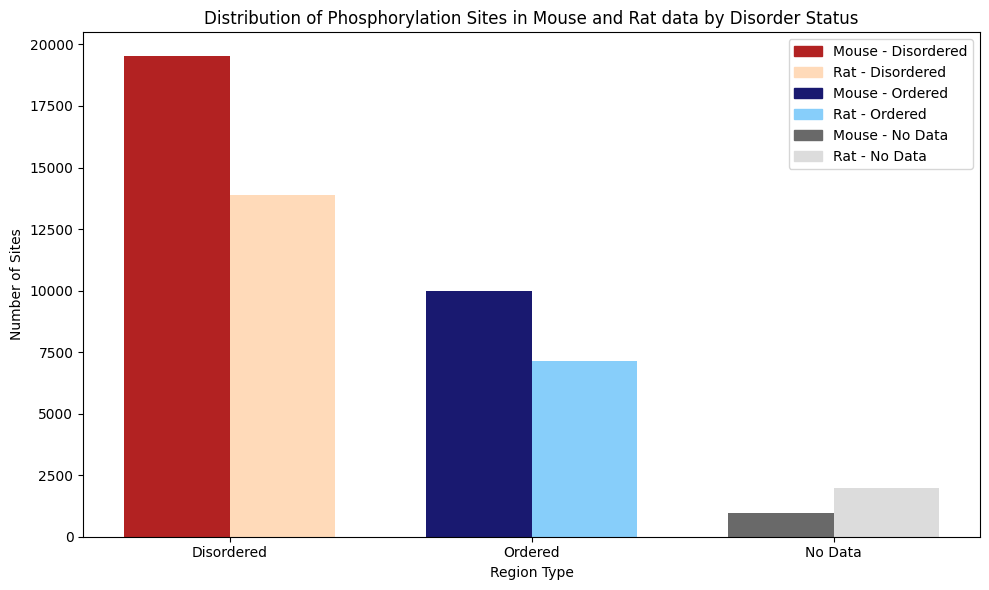

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the mouse disorder data
print("Loading mouse disorder data...")
df_mouse = pd.read_csv('../data/processed/mouse/full_disorder.csv')

print("Loading rat disorder data...")
df_rat = pd.read_csv('../data/processed/rat/full_disorder.csv')


print(f"Total mouse phosphorylation sites: {len(df_mouse)}")
print(f"Total rat phosphorylation sites: {len(df_rat)}")

# Count phosphorylations by disorder status (PM = phosphorylation mouse, PR = phosphorylation rat)
PM_disordered_count = len(df_mouse[df_mouse['disordered?'] == 1])
PM_ordered_count = len(df_mouse[df_mouse['disordered?'] == 0])
PM_no_data_count = len(df_mouse[df_mouse['disordered?'].isna()])

PR_disordered_count = len(df_rat[df_rat['disordered?'] == 1])
PR_ordered_count = len(df_rat[df_rat['disordered?'] == 0])
PR_no_data_count = len(df_rat[df_rat['disordered?'].isna()])

print(f"\nMouse data:")
print(f"Phosphorylation sites in disordered regions: {PM_disordered_count}")
print(f"Phosphorylation sites in ordered regions: {PM_ordered_count}")
print(f"Phosphorylation sites with no disorder data: {PM_no_data_count}")

print(f"\nRat data:")
print(f"Phosphorylation sites in disordered regions: {PR_disordered_count}")
print(f"Phosphorylation sites in ordered regions: {PR_ordered_count}")
print(f"Phosphorylation sites with no disorder data: {PR_no_data_count}")

# Calculate percentages Mouse data
total_PM_with_data = PM_disordered_count + PM_ordered_count
if total_PM_with_data > 0:
    PM_disordered_pct = (PM_disordered_count / total_PM_with_data) * 100
    PM_ordered_pct = (PM_ordered_count / total_PM_with_data) * 100
    
    print(f"\nPercentages Mouse Phosphorylation (excluding no data):")
    print(f"Disordered regions: {PM_disordered_pct:.1f}%")
    print(f"Ordered regions: {PM_ordered_pct:.1f}%")

# Calculate percentages Rat data
total_PR_with_data = PR_disordered_count + PR_ordered_count
if total_PR_with_data > 0:
    PR_disordered_pct = (PR_disordered_count / total_PR_with_data) * 100
    PR_ordered_pct = (PR_ordered_count / total_PR_with_data) * 100
    
    print(f"\nPercentages Rat Phosphorylation (excluding no data):")
    print(f"Disordered regions: {PR_disordered_pct:.1f}%")
    print(f"Ordered regions: {PR_ordered_pct:.1f}%")

# Create a simple bar chart
import matplotlib.patches as mpatches

plt.figure(figsize=(10, 6))
categories = ['Disordered', 'Ordered', 'No Data']
mouse_counts = [PM_disordered_count, PM_ordered_count, PM_no_data_count]
rat_counts = [PR_disordered_count, PR_ordered_count, PR_no_data_count]
mouse_colors = ['firebrick', 'midnightblue', 'dimgray']  # Darker colors for Mouse
rat_colors = ['peachpuff', 'lightskyblue', 'gainsboro']  # Lighter colors for Rat

x = np.arange(len(categories))
width = 0.35

for i in range(len(categories)):
    plt.bar(x[i] - width/2, mouse_counts[i], width, color=mouse_colors[i])
    plt.bar(x[i] + width/2, rat_counts[i], width, color=rat_colors[i])

# Create custom legend entries
legend_elements = []
for i, category in enumerate(categories):
    legend_elements.append(mpatches.Patch(color=mouse_colors[i], label=f'Mouse - {category}'))
    legend_elements.append(mpatches.Patch(color=rat_colors[i], label=f'Rat - {category}'))

plt.xlabel('Region Type')
plt.ylabel('Number of Sites')
plt.title('Distribution of Phosphorylation Sites in Mouse and Rat data by Disorder Status')
plt.xticks(x, categories)
plt.legend(handles=legend_elements, loc='upper right')
plt.tight_layout()
plt.show()


In [5]:
# Total S/T/Y residues in mouse and rat data
import os
import glob

# Count all S, T, Y residues from PUNCH2 results for mouse
print("Analyzing all S, T, Y residues from PUNCH2 results (Mouse)...")

Mouse_punch2_dir = "../outputs/punch2/Punch2_results_mouse"
Mouse_punch2_files = glob.glob(os.path.join(Mouse_punch2_dir, "*.csv"))

if not Mouse_punch2_files:
    print(f"Error: No PUNCH2 files found in {Mouse_punch2_dir}")
else:
    print(f"Found {len(Mouse_punch2_files)} PUNCH2 result files")

    # Initialize counters for each amino acid type
    # Disordered regions
    Mouse_s_disordered = 0
    Mouse_t_disordered = 0
    Mouse_y_disordered = 0
    
    # Ordered regions
    Mouse_s_ordered = 0
    Mouse_t_ordered = 0
    Mouse_y_ordered = 0
    
    # Totals
    Mouse_s_total = 0
    Mouse_t_total = 0
    Mouse_y_total = 0

    Mouse_total_ordered = 0
    Mouse_total_disordered = 0
    # Count all S/T/Y residues by disorder status
   
    Mouse_files_processed = 0
    
    for file_path in Mouse_punch2_files:
        try:
            # Read the PUNCH2 CSV file (no header, comma separated)
            with open(file_path, 'r') as f:
                lines = f.readlines()
            
            for line in lines:
                # Split by comma and strip whitespace
                entries = [entry.strip() for entry in line.split(',')]
                
                # Check if we have at least 4 entries
                if len(entries) >= 4:
                    # Entry 2 (index 1) is amino acid, Entry 4 (index 3) is disorder prediction
                    amino_acid = entries[1]
                    disorder_prediction = entries[3]

                    #Count total ordered and disordered residues
                    if disorder_prediction == '1':
                        Mouse_total_disordered += 1
                    elif disorder_prediction == '0':
                        Mouse_total_ordered += 1

                    # Count each amino acid type individually
                    if amino_acid == 'S':
                        Mouse_s_total += 1
                        if disorder_prediction == '1':
                            Mouse_s_disordered += 1
                        elif disorder_prediction == '0':
                            Mouse_s_ordered += 1
                    elif amino_acid == 'T':
                        Mouse_t_total += 1
                        if disorder_prediction == '1':
                            Mouse_t_disordered += 1
                        elif disorder_prediction == '0':
                            Mouse_t_ordered += 1
                    elif amino_acid == 'Y':
                        Mouse_y_total += 1
                        if disorder_prediction == '1':
                            Mouse_y_disordered += 1
                        elif disorder_prediction == '0':
                            Mouse_y_ordered += 1
            
            Mouse_files_processed += 1
            if Mouse_files_processed % 1000 == 0:
                print(f"Processed {Mouse_files_processed} files...")
                
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
            continue
    
    print(f"\nProcessed {Mouse_files_processed} Mouse PUNCH2 files")
    print(f"Total S residues in disordered regions: {Mouse_s_disordered}")
    print(f"Total S residues in ordered regions: {Mouse_s_ordered}")
    print(f"Total S residues: {Mouse_s_total}")

    print(f"\nTotal T residues in disordered regions: {Mouse_t_disordered}")
    print(f"Total T residues in ordered regions: {Mouse_t_ordered}")
    print(f"Total T residues: {Mouse_t_total}")

    print(f"\nTotal Y residues in disordered regions: {Mouse_y_disordered}")
    print(f"Total Y residues in ordered regions: {Mouse_y_ordered}")
    print(f"Total Y residues: {Mouse_y_total}")
    
    # Calculate total S/T/Y residues
    Mouse_total_sty_residues = Mouse_s_total + Mouse_t_total + Mouse_y_total
    Mouse_total_sty_disordered = Mouse_s_disordered + Mouse_t_disordered + Mouse_y_disordered
    Mouse_total_sty_ordered = Mouse_s_ordered + Mouse_t_ordered + Mouse_y_ordered

    print(f"\nTotal S/T/Y residues: {Mouse_total_sty_residues}")
    print(f"Total S/T/Y residues in disordered regions: {Mouse_total_sty_disordered}")
    print(f"Total S/T/Y residues in ordered regions: {Mouse_total_sty_ordered}")

    #Calculate total residues
    Mouse_total_residues = Mouse_total_ordered + Mouse_total_disordered

    print(f"Total ordered residues: {Mouse_total_ordered}")
    print(f"Total disordered residues: {Mouse_total_disordered}")
    print(f"Total residues: {Mouse_total_residues}")

    # Calculate percentages
    if Mouse_total_sty_residues > 0:
        Mouse_disordered_pct = (Mouse_total_sty_disordered / Mouse_total_sty_residues) * 100
        Mouse_ordered_pct = (Mouse_total_sty_ordered / Mouse_total_sty_residues) * 100
        
        print(f"\nPercentages of all S/T/Y residues:")
        print(f"Disordered regions: {Mouse_disordered_pct:.1f}%")
        print(f"Ordered regions: {Mouse_ordered_pct:.1f}%")

# Analyze Rat data  
print(f"\nAnalyzing all S, T, Y residues from PUNCH2 results (Rat)...")

rat_punch2_dir = "../outputs/punch2/Punch2_results_rat"
rat_punch2_files = glob.glob(os.path.join(rat_punch2_dir, "*.csv"))

if not rat_punch2_files:
    print(f"Error: No PUNCH2 files found in {rat_punch2_dir}")
else:
    print(f"Found {len(rat_punch2_files)} Rat PUNCH2 result files")

    # Initialize counters for each amino acid type
    # Disordered regions
    Rat_s_disordered = 0
    Rat_t_disordered = 0
    Rat_y_disordered = 0
    
    # Ordered regions
    Rat_s_ordered = 0
    Rat_t_ordered = 0
    Rat_y_ordered = 0
    
    # Totals
    Rat_s_total = 0
    Rat_t_total = 0
    Rat_y_total = 0

    Rat_total_ordered = 0
    Rat_total_disordered = 0

    # Count all S/T/Y residues by disorder status
   
    Rat_files_processed = 0
    
    for file_path in rat_punch2_files:
        try:
            # Read the PUNCH2 CSV file (no header, comma separated)
            with open(file_path, 'r') as f:
                lines = f.readlines()
            
            for line in lines:
                # Split by comma and strip whitespace
                entries = [entry.strip() for entry in line.split(',')]
                
                # Check if we have at least 4 entries
                if len(entries) >= 4:
                    # Entry 2 (index 1) is amino acid, Entry 4 (index 3) is disorder prediction
                    amino_acid = entries[1]
                    disorder_prediction = entries[3]
                    #Count total ordered and disordered residues
                    if disorder_prediction == '1':
                        Rat_total_disordered += 1
                    elif disorder_prediction == '0':
                        Rat_total_ordered += 1

                    # Count each amino acid type individually
                    if amino_acid == 'S':
                        Rat_s_total += 1
                        if disorder_prediction == '1':
                            Rat_s_disordered += 1
                        elif disorder_prediction == '0':
                            Rat_s_ordered += 1
                    elif amino_acid == 'T':
                        Rat_t_total += 1
                        if disorder_prediction == '1':
                            Rat_t_disordered += 1
                        elif disorder_prediction == '0':
                            Rat_t_ordered += 1
                    elif amino_acid == 'Y':
                        Rat_y_total += 1
                        if disorder_prediction == '1':
                            Rat_y_disordered += 1
                        elif disorder_prediction == '0':
                            Rat_y_ordered += 1
            
            Rat_files_processed += 1
            if Rat_files_processed % 1000 == 0:
                print(f"Processed {Rat_files_processed} files...")
                
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
            continue
    
    print(f"\nProcessed {Rat_files_processed} Rat PUNCH2 files")
    print(f"Total S residues in disordered regions: {Rat_s_disordered}")
    print(f"Total S residues in ordered regions: {Rat_s_ordered}")
    print(f"Total S residues: {Rat_s_total}")

    print(f"\nTotal T residues in disordered regions: {Rat_t_disordered}")
    print(f"Total T residues in ordered regions: {Rat_t_ordered}")
    print(f"Total T residues: {Rat_t_total}")

    print(f"\nTotal Y residues in disordered regions: {Rat_y_disordered}")
    print(f"Total Y residues in ordered regions: {Rat_y_ordered}")
    print(f"Total Y residues: {Rat_y_total}")
    
    # Calculate total S/T/Y residues
    Rat_total_sty_residues = Rat_s_total + Rat_t_total + Rat_y_total
    Rat_total_sty_disordered = Rat_s_disordered + Rat_t_disordered + Rat_y_disordered
    Rat_total_sty_ordered = Rat_s_ordered + Rat_t_ordered + Rat_y_ordered

    print(f"\nTotal S/T/Y residues: {Rat_total_sty_residues}")
    print(f"Total S/T/Y residues in disordered regions: {Rat_total_sty_disordered}")
    print(f"Total S/T/Y residues in ordered regions: {Rat_total_sty_ordered}")

    # Calculate total residues
    Rat_total_residues = Rat_total_ordered + Rat_total_disordered
  
    print(f"Total ordered residues: {Rat_total_ordered}")
    print(f"Total disordered residues: {Rat_total_disordered}")
    print(f"Total residues: {Rat_total_residues}")

    # Calculate percentages
    if Rat_total_sty_residues > 0:
        Rat_disordered_pct = (Rat_total_sty_disordered / Rat_total_sty_residues) * 100
        Rat_ordered_pct = (Rat_total_sty_ordered / Rat_total_sty_residues) * 100
        
        print(f"\nPercentages of all S/T/Y residues:")
        print(f"Disordered regions: {Rat_disordered_pct:.1f}%")
        print(f"Ordered regions: {Rat_ordered_pct:.1f}%")

Analyzing all S, T, Y residues from PUNCH2 results (Mouse)...
Found 6015 PUNCH2 result files
Processed 1000 files...
Processed 2000 files...
Processed 3000 files...
Processed 4000 files...
Processed 5000 files...
Processed 6000 files...

Processed 6015 Mouse PUNCH2 files
Total S residues in disordered regions: 178525
Total S residues in ordered regions: 256600
Total S residues: 435125

Total T residues in disordered regions: 72638
Total T residues in ordered regions: 183154
Total T residues: 255792

Total Y residues in disordered regions: 12972
Total Y residues in ordered regions: 102144
Total Y residues: 115116

Total S/T/Y residues: 806033
Total S/T/Y residues in disordered regions: 264135
Total S/T/Y residues in ordered regions: 541898
Total ordered residues: 3529137
Total disordered residues: 1268786
Total residues: 4797923

Percentages of all S/T/Y residues:
Disordered regions: 32.8%
Ordered regions: 67.2%

Analyzing all S, T, Y residues from PUNCH2 results (Rat)...
Found 5772 Rat

Calculating phosphorylation enrichment for mouse data...
Percentage of phosphorylated residues in disordered regions: 7.389%
  (19517 phosphorylated out of 264135 total S/T/Y residues)
Percentage of phosphorylated residues in ordered regions: 1.839%
  (9967 phosphorylated out of 541898 total S/T/Y residues)

Enrichment ratio (disordered/ordered): 4.02x
→ Phosphorylation is 4.02x more enriched in disordered regions

Calculating phosphorylation enrichment for rat data...
Percentage of phosphorylated residues in disordered regions: 5.636%
  (13897 phosphorylated out of 246567 total S/T/Y residues)
Percentage of phosphorylated residues in ordered regions: 1.375%
  (7136 phosphorylated out of 519128 total S/T/Y residues)

Enrichment ratio (disordered/ordered): 4.10x
→ Phosphorylation is 4.10x more enriched in disordered regions


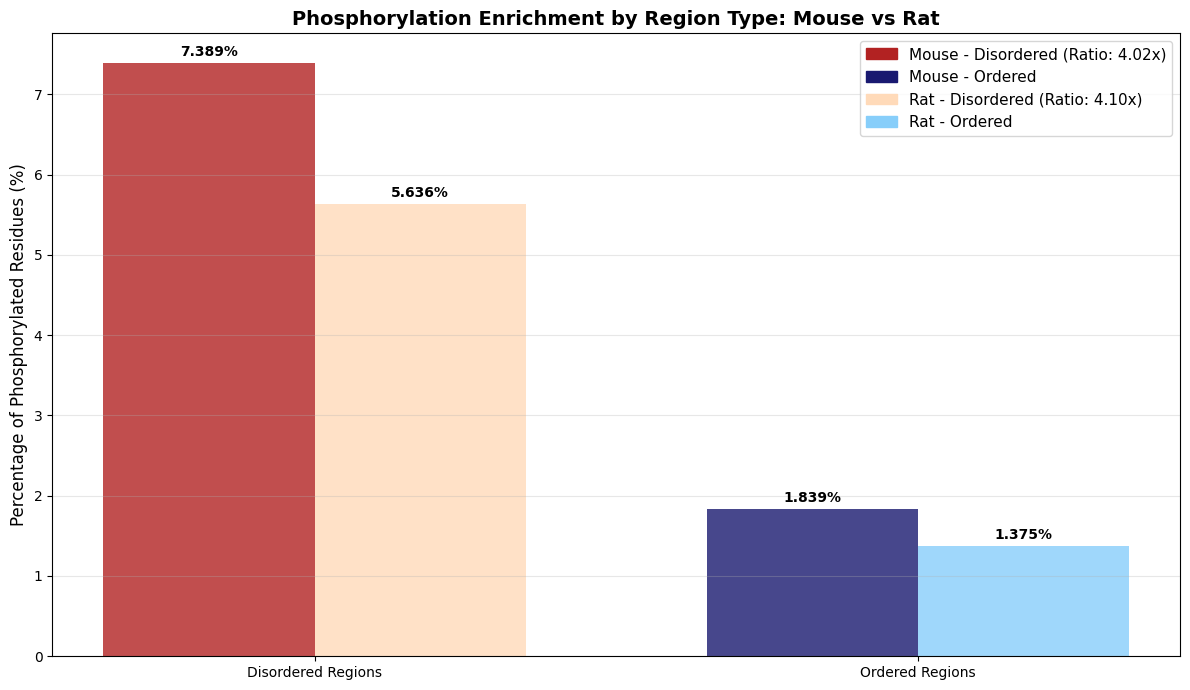

In [6]:
# Calculate phosphorylation enrichment for mouse data 
print("Calculating phosphorylation enrichment for mouse data...")

# Percentage of phosphorylated residues in disordered regions
if Mouse_total_sty_disordered > 0:
    PM_in_disordered_pct = (PM_disordered_count / Mouse_total_sty_disordered) * 100
    print(f"Percentage of phosphorylated residues in disordered regions: {PM_in_disordered_pct:.3f}%")
    print(f"  ({PM_disordered_count} phosphorylated out of {Mouse_total_sty_disordered} total S/T/Y residues)")
else:
    PM_in_disordered_pct = 0
    print("No S/T/Y residues found in disordered regions")

# Percentage of phosphorylated residues in ordered regions
if Mouse_total_sty_ordered > 0:
    PM_in_ordered_pct = (PM_ordered_count / Mouse_total_sty_ordered) * 100
    print(f"Percentage of phosphorylated residues in ordered regions: {PM_in_ordered_pct:.3f}%")
    print(f"  ({PM_ordered_count} phosphorylated out of {Mouse_total_sty_ordered} total S/T/Y residues)")
else:
    PM_in_ordered_pct = 0
    print("No S/T/Y residues found in ordered regions")

# Calculate enrichment ratio
if PM_in_ordered_pct > 0:
    PM_enrichment_ratio = PM_in_disordered_pct / PM_in_ordered_pct
    print(f"\nEnrichment ratio (disordered/ordered): {PM_enrichment_ratio:.2f}x")
    if PM_enrichment_ratio > 1:
        print(f"→ Phosphorylation is {PM_enrichment_ratio:.2f}x more enriched in disordered regions")
    elif PM_enrichment_ratio < 1:
        print(f"→ Phosphorylation is {1/PM_enrichment_ratio:.2f}x more enriched in ordered regions")
    else:
        print("→ Phosphorylation shows equal enrichment in both regions")

# Calculate phosphorylation enrichment for rat data
print("\nCalculating phosphorylation enrichment for rat data...")

# Percentage of phosphorylated residues in disordered regions
if Rat_total_sty_disordered > 0:
    PR_in_disordered_pct = (PR_disordered_count / Rat_total_sty_disordered) * 100
    print(f"Percentage of phosphorylated residues in disordered regions: {PR_in_disordered_pct:.3f}%")
    print(f"  ({PR_disordered_count} phosphorylated out of {Rat_total_sty_disordered} total S/T/Y residues)")
else:
    PR_in_disordered_pct = 0
    print("No S/T/Y residues found in disordered regions")

# Percentage of phosphorylated residues in ordered regions
if Rat_total_sty_ordered > 0:
    PR_in_ordered_pct = (PR_ordered_count / Rat_total_sty_ordered) * 100
    print(f"Percentage of phosphorylated residues in ordered regions: {PR_in_ordered_pct:.3f}%")
    print(f"  ({PR_ordered_count} phosphorylated out of {Rat_total_sty_ordered} total S/T/Y residues)")
else:
    PR_in_ordered_pct = 0
    print("No S/T/Y residues found in ordered regions")

# Calculate enrichment ratio
if PR_in_ordered_pct > 0:
    PR_enrichment_ratio = PR_in_disordered_pct / PR_in_ordered_pct
    print(f"\nEnrichment ratio (disordered/ordered): {PR_enrichment_ratio:.2f}x")
    if PR_enrichment_ratio > 1:
        print(f"→ Phosphorylation is {PR_enrichment_ratio:.2f}x more enriched in disordered regions")
    elif PR_enrichment_ratio < 1:
        print(f"→ Phosphorylation is {1/PR_enrichment_ratio:.2f}x more enriched in ordered regions")
    else:
        print("→ Phosphorylation shows equal enrichment in both regions")


# Create visualization
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 7))

# Comparison of phosphorylation percentages for both Mouse and Rat
categories = ['Disordered Regions', 'Ordered Regions']
mouse_percentages = [PM_in_disordered_pct, PM_in_ordered_pct]
rat_percentages = [PR_in_disordered_pct, PR_in_ordered_pct]

x = np.arange(len(categories))
width = 0.35

# Define colors
mouse_colors = ['firebrick', 'midnightblue']  # Red for disordered, blue for ordered
rat_colors = ['peachpuff', 'lightskyblue']    # Light red for disordered, light blue for ordered

# Create bars
bars1 = plt.bar(x - width/2, mouse_percentages, width, 
                color=mouse_colors, alpha=0.8)
bars2 = plt.bar(x + width/2, rat_percentages, width, 
                color=rat_colors, alpha=0.8)

plt.ylabel('Percentage of Phosphorylated Residues (%)', fontsize=12)
plt.title('Phosphorylation Enrichment by Region Type: Mouse vs Rat', fontsize=14, fontweight='bold')
plt.xticks(x, categories)
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bars, percentages in [(bars1, mouse_percentages), (bars2, rat_percentages)]:
    for bar, pct in zip(bars, percentages):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                 f'{pct:.3f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Create custom legend with all four colors and enrichment ratios
legend_elements = [
    mpatches.Patch(color=mouse_colors[0], label=f'Mouse - Disordered (Ratio: {PM_enrichment_ratio:.2f}x)'),
    mpatches.Patch(color=mouse_colors[1], label=f'Mouse - Ordered'),
    mpatches.Patch(color=rat_colors[0], label=f'Rat - Disordered (Ratio: {PR_enrichment_ratio:.2f}x)'),
    mpatches.Patch(color=rat_colors[1], label=f'Rat - Ordered')
]

plt.legend(handles=legend_elements, loc='upper right', fontsize=11)

plt.tight_layout()
plt.show()




Mouse data:
percentage of all residues in disordered regions that are S: 14.1%
percentage of all residues in ordered regions that are S: 7.3%
percentage of all residues in disordered regions that are T: 5.7%
percentage of all residues in ordered regions that are T: 5.2%
percentage of all residues in disordered regions that are Y: 1.0%
percentage of all residues in ordered regions that are Y: 2.9%

percentage of all residues in disordered regions that are S, T, or Y: 20.8%
percentage of all residues in ordered regions that are S, T, or Y: 15.4%

Rat data:
percentage of all residues in disordered regions that are S: 13.9%
percentage of all residues in ordered regions that are S: 7.2%
percentage of all residues in disordered regions that are T: 5.7%
percentage of all residues in ordered regions that are T: 5.2%
percentage of all residues in disordered regions that are Y: 1.0%
percentage of all residues in ordered regions that are Y: 2.9%

percentage of all residues in disordered regions 

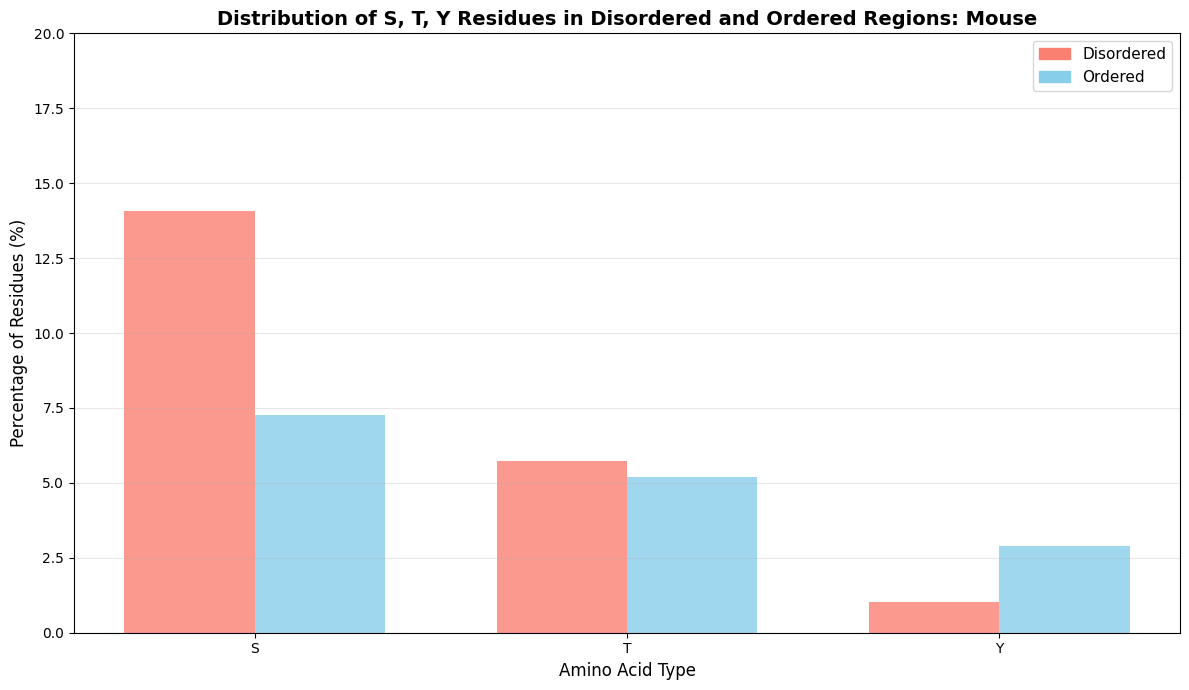

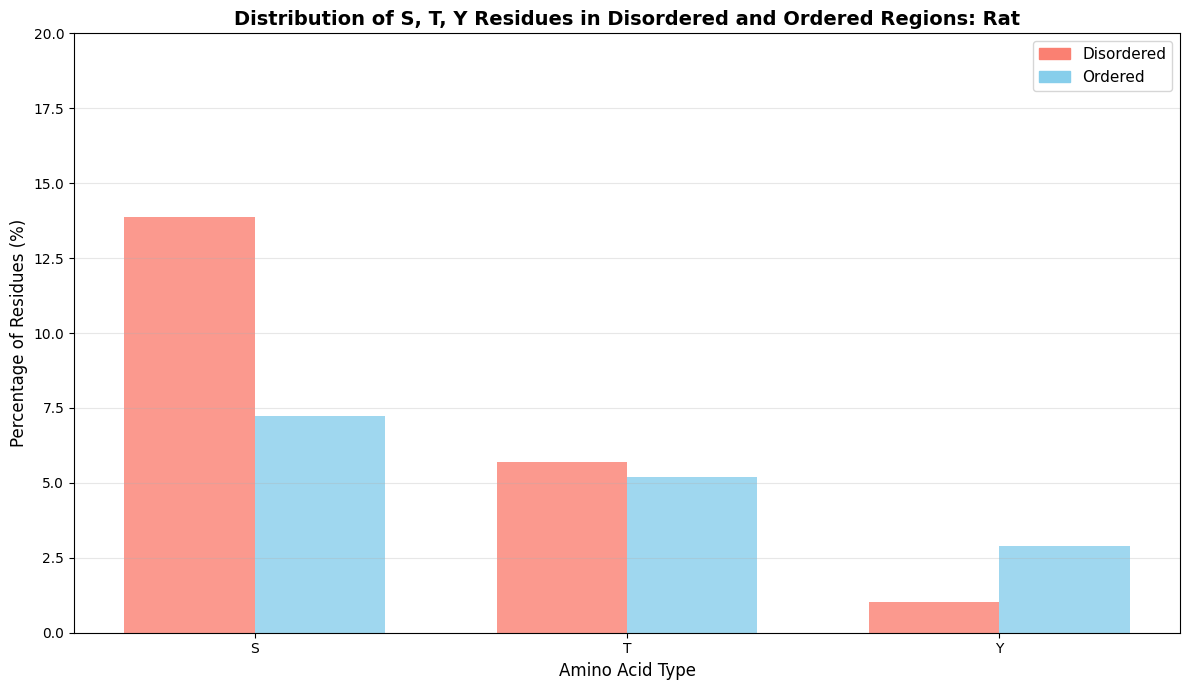

In [7]:
# Distribution of S, T, Y residues in disordered and ordered regions compared to all amino acids


print(f"\nMouse data:")
Mouse_percentage_s_disordered = (Mouse_s_disordered / Mouse_total_disordered) * 100
Mouse_percentage_s_ordered = (Mouse_s_ordered / Mouse_total_ordered) * 100
Mouse_percentage_t_disordered = (Mouse_t_disordered / Mouse_total_disordered) * 100
Mouse_percentage_t_ordered = (Mouse_t_ordered / Mouse_total_ordered) * 100
Mouse_percentage_y_disordered = (Mouse_y_disordered / Mouse_total_disordered) * 100
Mouse_percentage_y_ordered = (Mouse_y_ordered / Mouse_total_ordered) * 100
print(f"percentage of all residues in disordered regions that are S: {Mouse_percentage_s_disordered:.1f}%")
print(f"percentage of all residues in ordered regions that are S: {Mouse_percentage_s_ordered:.1f}%")
print(f"percentage of all residues in disordered regions that are T: {Mouse_percentage_t_disordered:.1f}%")
print(f"percentage of all residues in ordered regions that are T: {Mouse_percentage_t_ordered:.1f}%")
print(f"percentage of all residues in disordered regions that are Y: {Mouse_percentage_y_disordered:.1f}%")
print(f"percentage of all residues in ordered regions that are Y: {Mouse_percentage_y_ordered:.1f}%")
print(f"\npercentage of all residues in disordered regions that are S, T, or Y: {Mouse_percentage_s_disordered + Mouse_percentage_t_disordered + Mouse_percentage_y_disordered:.1f}%")
print(f"percentage of all residues in ordered regions that are S, T, or Y: {Mouse_percentage_s_ordered + Mouse_percentage_t_ordered + Mouse_percentage_y_ordered:.1f}%")

print(f"\nRat data:")
Rat_percentage_s_disordered = (Rat_s_disordered / Rat_total_disordered) * 100
Rat_percentage_s_ordered = (Rat_s_ordered / Rat_total_ordered) * 100
Rat_percentage_t_disordered = (Rat_t_disordered / Rat_total_disordered) * 100
Rat_percentage_t_ordered = (Rat_t_ordered / Rat_total_ordered) * 100
Rat_percentage_y_disordered = (Rat_y_disordered / Rat_total_disordered) * 100
Rat_percentage_y_ordered = (Rat_y_ordered / Rat_total_ordered) * 100
print(f"percentage of all residues in disordered regions that are S: {Rat_percentage_s_disordered:.1f}%")
print(f"percentage of all residues in ordered regions that are S: {Rat_percentage_s_ordered:.1f}%")
print(f"percentage of all residues in disordered regions that are T: {Rat_percentage_t_disordered:.1f}%")
print(f"percentage of all residues in ordered regions that are T: {Rat_percentage_t_ordered:.1f}%")
print(f"percentage of all residues in disordered regions that are Y: {Rat_percentage_y_disordered:.1f}%")
print(f"percentage of all residues in ordered regions that are Y: {Rat_percentage_y_ordered:.1f}%")
print(f"\npercentage of all residues in disordered regions that are S, T, or Y: {Rat_percentage_s_disordered + Rat_percentage_t_disordered + Rat_percentage_y_disordered:.1f}%")
print(f"percentage of all residues in ordered regions that are S, T, or Y: {Rat_percentage_s_ordered + Rat_percentage_t_ordered + Rat_percentage_y_ordered:.1f}%")


# Create visualization of S, T, Y percentages in disordered and ordered regions
fig1 = plt.figure(figsize=(12, 7))
categories = ['S', 'T', 'Y']
mouse_disordered_percentages = [Mouse_percentage_s_disordered, Mouse_percentage_t_disordered, Mouse_percentage_y_disordered]
mouse_ordered_percentages = [Mouse_percentage_s_ordered, Mouse_percentage_t_ordered, Mouse_percentage_y_ordered]

x = np.arange(len(categories))
width = 0.35

bars1 = plt.bar(x - width/2, mouse_disordered_percentages, width, 
                color='salmon', alpha=0.8)
bars2 = plt.bar(x + width/2, mouse_ordered_percentages, width, 
                color='skyblue', alpha=0.8)

plt.xlabel('Amino Acid Type', fontsize=12)
plt.ylabel('Percentage of Residues (%)', fontsize=12)
plt.title('Distribution of S, T, Y Residues in Disordered and Ordered Regions: Mouse', fontsize=14, fontweight='bold')
plt.xticks(x, categories)
plt.grid(True, alpha=0.3, axis='y')
plt.ylim(0, 20)

plt.legend(handles=[
    mpatches.Patch(color='salmon', label='Disordered'),
    mpatches.Patch(color='skyblue', label='Ordered')
], loc='upper right', fontsize=11)

plt.tight_layout()
plt.show()


fig1 = plt.figure(figsize=(12, 7))
categories = ['S', 'T', 'Y']
Rat_disordered_percentages = [Rat_percentage_s_disordered, Rat_percentage_t_disordered, Rat_percentage_y_disordered]
Rat_ordered_percentages = [Rat_percentage_s_ordered, Rat_percentage_t_ordered, Rat_percentage_y_ordered]

x = np.arange(len(categories))
width = 0.35

bars1 = plt.bar(x - width/2, Rat_disordered_percentages, width, 
                color='salmon', alpha=0.8)
bars2 = plt.bar(x + width/2, Rat_ordered_percentages, width, 
                color='skyblue', alpha=0.8)

plt.xlabel('Amino Acid Type', fontsize=12)
plt.ylabel('Percentage of Residues (%)', fontsize=12)
plt.title('Distribution of S, T, Y Residues in Disordered and Ordered Regions: Rat', fontsize=14, fontweight='bold')
plt.xticks(x, categories)
plt.grid(True, alpha=0.3, axis='y')
plt.ylim(0, 20)

plt.legend(handles=[
    mpatches.Patch(color='salmon', label='Disordered'),
    mpatches.Patch(color='skyblue', label='Ordered')
], loc='upper right', fontsize=11)

plt.tight_layout()
plt.show()








Mouse data:

Phosphorylated S in disordered regions: 16417
Total S residues in disordered regions: 178525
Phosphorylated S in ordered regions: 7987
Total S residues in ordered regions: 256600
Percent of S residues that are phosphorylated in disordered regions: 9.2%
Percent of S residues that are phosphorylated in ordered regions: 3.1%
Phosphorylation enrichment of S in disordered regions: 2.95x

Phosphorylated T in disordered regions: 2855
Total T residues in disordered regions: 72638
Phosphorylated T in ordered regions: 1576
Total T residues in ordered regions: 183154
Percent of T residues that are phosphorylated in disordered regions: 3.9%
Percent of T residues that are phosphorylated in ordered regions: 0.9%
Phosphorylation enrichment of T in disordered regions: 4.57x

Phosphorylated Y in disordered regions: 245
Total Y residues in disordered regions: 12972
Phosphorylated Y in ordered regions: 404
Total Y residues in ordered regions: 102144
Percent of Y residues that are phosphoryl

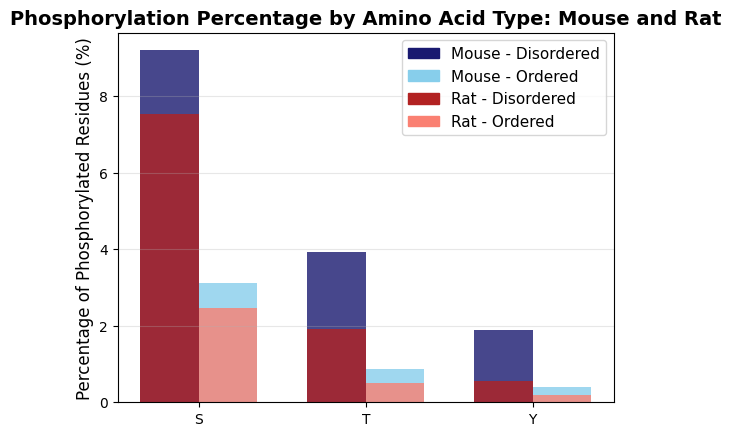

In [8]:
# Distribution of phosphorylated S, T, Y residues in disordered and ordered regions compared to
# all potential phosphorylation sites for that residue

print(f"\nMouse data:")

# Mouse data Phosphorylation per amino acid type percentages:
PM_s_disordered_count = len(df_mouse[(df_mouse['disordered?'] == 1) & (df_mouse['amino_acid'] == 'S')])
PM_s_ordered_count = len(df_mouse[(df_mouse['disordered?'] == 0) & (df_mouse['amino_acid'] == 'S')])
#Calculation of percent of disordere and ordered S residues that are phosphorylated
PM_s_disordered_pct = (PM_s_disordered_count / Mouse_s_disordered) * 100
PM_s_ordered_pct = (PM_s_ordered_count / Mouse_s_ordered) * 100
#Phosphorylation enrichment in disordered regions:
PM_s_enrichment_ratio = PM_s_disordered_pct / PM_s_ordered_pct

print(f"\nPhosphorylated S in disordered regions: {PM_s_disordered_count}")
print(f"Total S residues in disordered regions: {Mouse_s_disordered}")
print(f"Phosphorylated S in ordered regions: {PM_s_ordered_count}")
print(f"Total S residues in ordered regions: {Mouse_s_ordered}")
print(f"Percent of S residues that are phosphorylated in disordered regions: {PM_s_disordered_pct:.1f}%")
print(f"Percent of S residues that are phosphorylated in ordered regions: {PM_s_ordered_pct:.1f}%")
print(f"Phosphorylation enrichment of S in disordered regions: {PM_s_enrichment_ratio:.2f}x")

PM_t_disordered_count = len(df_mouse[(df_mouse['disordered?'] == 1) & (df_mouse['amino_acid'] == 'T')])
PM_t_ordered_count = len(df_mouse[(df_mouse['disordered?'] == 0) & (df_mouse['amino_acid'] == 'T')])
PM_t_disordered_pct = (PM_t_disordered_count / Mouse_t_disordered) * 100
PM_t_ordered_pct = (PM_t_ordered_count / Mouse_t_ordered) * 100
PM_t_enrichment_ratio = PM_t_disordered_pct / PM_t_ordered_pct

print(f"\nPhosphorylated T in disordered regions: {PM_t_disordered_count}")
print(f"Total T residues in disordered regions: {Mouse_t_disordered}")
print(f"Phosphorylated T in ordered regions: {PM_t_ordered_count}")
print(f"Total T residues in ordered regions: {Mouse_t_ordered}")
print(f"Percent of T residues that are phosphorylated in disordered regions: {PM_t_disordered_pct:.1f}%")
print(f"Percent of T residues that are phosphorylated in ordered regions: {PM_t_ordered_pct:.1f}%")
print(f"Phosphorylation enrichment of T in disordered regions: {PM_t_enrichment_ratio:.2f}x")

PM_y_disordered_count = len(df_mouse[(df_mouse['disordered?'] == 1) & (df_mouse['amino_acid'] == 'Y')])
PM_y_ordered_count = len(df_mouse[(df_mouse['disordered?'] == 0) & (df_mouse['amino_acid'] == 'Y')])
PM_y_disordered_pct = (PM_y_disordered_count / Mouse_y_disordered) * 100
PM_y_ordered_pct = (PM_y_ordered_count / Mouse_y_ordered) * 100
PM_y_enrichment_ratio = PM_y_disordered_pct / PM_y_ordered_pct

print(f"\nPhosphorylated Y in disordered regions: {PM_y_disordered_count}")
print(f"Total Y residues in disordered regions: {Mouse_y_disordered}")
print(f"Phosphorylated Y in ordered regions: {PM_y_ordered_count}")
print(f"Total Y residues in ordered regions: {Mouse_y_ordered}")
print(f"Percent of Y residues that are phosphorylated in disordered regions: {PM_y_disordered_pct:.1f}%")
print(f"Percent of Y residues that are phosphorylated in ordered regions: {PM_y_ordered_pct:.1f}%")
print(f"Phosphorylation enrichment of Y in disordered regions: {PM_y_enrichment_ratio:.2f}x")


# Rat data Phosphorylation per amino acid type percentages:

print(f"\nRat data:")

PR_s_disordered_count = len(df_rat[(df_rat['disordered?'] == 1) & (df_rat['amino_acid'] == 'S')])
PR_s_ordered_count = len(df_rat[(df_rat['disordered?'] == 0) & (df_rat['amino_acid'] == 'S')])
#Calculation of percent of disordered and ordered S residues that are phosphorylated
PR_s_disordered_pct = (PR_s_disordered_count / Rat_s_disordered) * 100
PR_s_ordered_pct = (PR_s_ordered_count / Rat_s_ordered) * 100
#Phosphorylation enrichment in disordered regions:
PR_s_enrichment_Ratio = PR_s_disordered_pct / PR_s_ordered_pct

print(f"\nPhosphorylated S in disordered regions: {PR_s_disordered_count}")
print(f"Total S residues in disordered regions: {Rat_s_disordered}")
print(f"Phosphorylated S in ordered regions: {PR_s_ordered_count}")
print(f"Total S residues in ordered regions: {Rat_s_ordered}")
print(f"Percent of S residues that are phosphorylated in disordered regions: {PR_s_disordered_pct:.1f}%")
print(f"Percent of S residues that are phosphorylated in ordered regions: {PR_s_ordered_pct:.1f}%")
print(f"Phosphorylation enrichment of S in disordered regions: {PR_s_enrichment_Ratio:.2f}x")

PR_t_disordered_count = len(df_rat[(df_rat['disordered?'] == 1) & (df_rat['amino_acid'] == 'T')])
PR_t_ordered_count = len(df_rat[(df_rat['disordered?'] == 0) & (df_rat['amino_acid'] == 'T')])
PR_t_disordered_pct = (PR_t_disordered_count / Rat_t_disordered) * 100
PR_t_ordered_pct = (PR_t_ordered_count / Rat_t_ordered) * 100
PR_t_enrichment_Ratio = PR_t_disordered_pct / PR_t_ordered_pct

print(f"\nPhosphorylated T in disordered regions: {PR_t_disordered_count}")
print(f"Total T residues in disordered regions: {Rat_t_disordered}")
print(f"Phosphorylated T in ordered regions: {PR_t_ordered_count}")
print(f"Total T residues in ordered regions: {Rat_t_ordered}")
print(f"Percent of T residues that are phosphorylated in disordered regions: {PR_t_disordered_pct:.1f}%")
print(f"Percent of T residues that are phosphorylated in ordered regions: {PR_t_ordered_pct:.1f}%")
print(f"Phosphorylation enrichment of T in disordered regions: {PR_t_enrichment_Ratio:.2f}x")

PR_y_disordered_count = len(df_rat[(df_rat['disordered?'] == 1) & (df_rat['amino_acid'] == 'Y')])
PR_y_ordered_count = len(df_rat[(df_rat['disordered?'] == 0) & (df_rat['amino_acid'] == 'Y')])
PR_y_disordered_pct = (PR_y_disordered_count / Rat_y_disordered) * 100
PR_y_ordered_pct = (PR_y_ordered_count / Rat_y_ordered) * 100
PR_y_enrichment_Ratio = PR_y_disordered_pct / PR_y_ordered_pct

print(f"\nPhosphorylated Y in disordered regions: {PR_y_disordered_count}")
print(f"Total Y residues in disordered regions: {Rat_y_disordered}")
print(f"Phosphorylated Y in ordered regions: {PR_y_ordered_count}")
print(f"Total Y residues in ordered regions: {Rat_y_ordered}")
print(f"Percent of Y residues that are phosphorylated in disordered regions: {PR_y_disordered_pct:.1f}%")
print(f"Percent of Y residues that are phosphorylated in ordered regions: {PR_y_ordered_pct:.1f}%")
print(f"Phosphorylation enrichment of Y in disordered regions: {PR_y_enrichment_Ratio:.2f}x")

# Create visualization of Mouse phosphorylation percentages per amino acid type in ordered and disordered regions

categories = ['S', 'T', 'Y']
mouse_disordered_percentages = [PM_s_disordered_pct, PM_t_disordered_pct, PM_y_disordered_pct]
mouse_ordered_percentages = [PM_s_ordered_pct, PM_t_ordered_pct, PM_y_ordered_pct]

x = np.arange(len(categories))
width = 0.35

rat_disordered_percentages = [PR_s_disordered_pct, PR_t_disordered_pct, PR_y_disordered_pct]
rat_ordered_percentages = [PR_s_ordered_pct, PR_t_ordered_pct, PR_y_ordered_pct]

x = np.arange(len(categories))
width = 0.35

# Define colors
mouse_ordered_color = 'skyblue'
mouse_disordered_color = 'midnightblue'
rat_ordered_color = 'salmon'
rat_disordered_color = 'firebrick'

# Create bars

bars1 = plt.bar(x - width/2, mouse_disordered_percentages, width, 
                color=mouse_disordered_color, alpha=0.8)
bars2 = plt.bar(x + width/2, mouse_ordered_percentages, width, 
                color=mouse_ordered_color, alpha=0.8)
bars1 = plt.bar(x - width/2, rat_disordered_percentages, width, 
                color=rat_disordered_color, alpha=0.8)
bars2 = plt.bar(x + width/2, rat_ordered_percentages, width, 
                color=rat_ordered_color, alpha=0.8)

plt.ylabel('Percentage of Phosphorylated Residues (%)', fontsize=12)
plt.title('Phosphorylation Percentage by Amino Acid Type: Mouse and Rat', fontsize=14, fontweight='bold')
plt.xticks(x, categories)
plt.grid(True, alpha=0.3, axis='y')

legend_elements = [
    mpatches.Patch(color=mouse_disordered_color, label='Mouse - Disordered'),
    mpatches.Patch(color=mouse_ordered_color, label='Mouse - Ordered'),
    mpatches.Patch(color=rat_disordered_color, label='Rat - Disordered'),
    mpatches.Patch(color=rat_ordered_color, label='Rat - Ordered')
]

plt.legend(handles=legend_elements, loc='upper right', fontsize=11)


# Summary of S, T, Y enrichments
print(f"\nSUMMARY:")
print(f"Mouse data:")
print(f"S: {PM_s_enrichment_ratio:.2f}x enriched in disordered regions")
print(f"T: {PM_t_enrichment_ratio:.2f}x enriched in disordered regions")
print(f"Y: {PM_y_enrichment_ratio:.2f}x enriched in disordered regions")

print(f"\nRat data:")
print(f"S: {PR_s_enrichment_Ratio:.2f}x enriched in disordered regions")
print(f"T: {PR_t_enrichment_Ratio:.2f}x enriched in disordered regions")
print(f"Y: {PR_y_enrichment_Ratio:.2f}x enriched in disordered regions")







In [9]:
# Distribution of phosphorylation sites by tissue count in mouse

print(f"Calculating number of possible S, T, Y residues per tissue number in mouse:")

Mouse_ids_1 = df_mouse.loc[df_mouse["total_tissue_num"] == 1]["protein_id"].unique().tolist()
Mouse_ids_2 = df_mouse.loc[df_mouse["total_tissue_num"] == 2]["protein_id"].unique().tolist()
Mouse_ids_3 = df_mouse.loc[df_mouse["total_tissue_num"] == 3]["protein_id"].unique().tolist()
Mouse_ids_4 = df_mouse.loc[df_mouse["total_tissue_num"] == 4]["protein_id"].unique().tolist()
Mouse_ids_5 = df_mouse.loc[df_mouse["total_tissue_num"] == 5]["protein_id"].unique().tolist()
Mouse_ids_6 = df_mouse.loc[df_mouse["total_tissue_num"] == 6]["protein_id"].unique().tolist()
Mouse_ids_7 = df_mouse.loc[df_mouse["total_tissue_num"] == 7]["protein_id"].unique().tolist()
Mouse_ids_8 = df_mouse.loc[df_mouse["total_tissue_num"] == 8]["protein_id"].unique().tolist()
Mouse_ids_9 = df_mouse.loc[df_mouse["total_tissue_num"] == 9]["protein_id"].unique().tolist()

Mouse_ids_per_tissue_num = { 
    1: Mouse_ids_1,
    2: Mouse_ids_2,
    3: Mouse_ids_3,
    4: Mouse_ids_4,
    5: Mouse_ids_5,
    6: Mouse_ids_6,
    7: Mouse_ids_7,
    8: Mouse_ids_8,
    9: Mouse_ids_9,
}

print(f"\nAnalyzing all S, T, Y residues from PUNCH2 results (Mouse)...")

Mouse_punch2_dir = "../outputs/punch2/Punch2_results_mouse"
Mouse_punch2_files = glob.glob(os.path.join(Mouse_punch2_dir, "*.csv"))

# Initialize counters using dictionary
# Separate counters for S, T, Y and total S/T/Y
Mouse_s_counts = {
    'disordered': {i: 0 for i in range(1, 10)},
    'ordered': {i: 0 for i in range(1, 10)}
}
Mouse_t_counts = {
    'disordered': {i: 0 for i in range(1, 10)},
    'ordered': {i: 0 for i in range(1, 10)}
}
Mouse_y_counts = {
    'disordered': {i: 0 for i in range(1, 10)},
    'ordered': {i: 0 for i in range(1, 10)}
}
Mouse_sty_counts = {
    'disordered': {i: 0 for i in range(1, 10)},
    'ordered': {i: 0 for i in range(1, 10)}
}


if not Mouse_punch2_files:
    print(f"Error: No PUNCH2 files found in {Mouse_punch2_dir}")
else:
    print(f"Found {len(Mouse_punch2_files)} Mouse PUNCH2 result files")

   

    Mouse_files_processed = 0
    
    
    # Convert lists to sets for faster lookup
    Mouse_ids_sets = {tissue_num: set(id_list) for tissue_num, id_list in Mouse_ids_per_tissue_num.items()}
    
    
    for file_path in Mouse_punch2_files:
        try:
            # Extract protein ID from filename
            # Filename format: sp|A0A087WPF7|A0A087WPF7_MOUSE.csv
            filename = os.path.basename(file_path)
            # Remove .csv extension and _MOUSE suffix
            protein_id = filename.replace('_MOUSE.csv', '').split('|')[-1]
            
            # Find which tissue number(s) this protein belongs to
            matching_tissue_nums = []
            for tissue_num, id_set in Mouse_ids_sets.items():
                if protein_id in id_set:
                    matching_tissue_nums.append(tissue_num)
            
            # If protein doesn't match any tissue number, skip it
            if not matching_tissue_nums:
                continue
            
            # Read the PUNCH2 CSV file (no header, comma separated)
            with open(file_path, 'r') as f:
                lines = f.readlines()
            
            # Count S/T/Y residues for this protein
            for line in lines:
                # Split by comma and strip whitespace
                entries = [entry.strip() for entry in line.split(',')]
                
                # Check if we have at least 4 entries
                if len(entries) >= 4:
                    # Entry 2 (index 1) is amino acid, Entry 4 (index 3) is disorder prediction
                    amino_acid = entries[1]
                    disorder_prediction = entries[3]
                    
                    # Count S, T, Y residues separately
                    if amino_acid == 'S':
                        # For each tissue number this protein belongs to, add the count
                        for tissue_num in matching_tissue_nums:
                            if disorder_prediction == '1':  # Disordered
                                Mouse_s_counts['disordered'][tissue_num] += 1
                            elif disorder_prediction == '0':  # Ordered
                                Mouse_s_counts['ordered'][tissue_num] += 1
                    elif amino_acid == 'T':
                        # For each tissue number this protein belongs to, add the count
                        for tissue_num in matching_tissue_nums:
                            if disorder_prediction == '1':  # Disordered
                                Mouse_t_counts['disordered'][tissue_num] += 1
                            elif disorder_prediction == '0':  # Ordered
                                Mouse_t_counts['ordered'][tissue_num] += 1
                    elif amino_acid == 'Y':
                        # For each tissue number this protein belongs to, add the count
                        for tissue_num in matching_tissue_nums:
                            if disorder_prediction == '1':  # Disordered
                                Mouse_y_counts['disordered'][tissue_num] += 1
                            elif disorder_prediction == '0':  # Ordered
                                Mouse_y_counts['ordered'][tissue_num] += 1
            
            Mouse_files_processed += 1
            if Mouse_files_processed % 1000 == 0:
                print(f"Processed {Mouse_files_processed} files...")
                
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
            continue
    
print(f"\nProcessed {Mouse_files_processed} Mouse PUNCH2 files")

# Calculate total S/T/Y counts by summing S, T, Y
for tissue_num in range(1, 10):
    Mouse_sty_counts['disordered'][tissue_num] = (Mouse_s_counts['disordered'][tissue_num] + 
                                                   Mouse_t_counts['disordered'][tissue_num] + 
                                                   Mouse_y_counts['disordered'][tissue_num])
    Mouse_sty_counts['ordered'][tissue_num] = (Mouse_s_counts['ordered'][tissue_num] + 
                                                 Mouse_t_counts['ordered'][tissue_num] + 
                                                 Mouse_y_counts['ordered'][tissue_num])

# Print results and store in variables
print("\nS/T/Y residue counts by tissue number (with individual S, T, Y breakdown):")

# Store counts in variables for later use
Mouse_sty_disordered_by_tissue = {}
Mouse_sty_ordered_by_tissue = {}
Mouse_s_disordered_by_tissue = {}
Mouse_s_ordered_by_tissue = {}
Mouse_t_disordered_by_tissue = {}
Mouse_t_ordered_by_tissue = {}
Mouse_y_disordered_by_tissue = {}
Mouse_y_ordered_by_tissue = {}

for tissue_num in range(1, 10):
    # Individual counts
    s_disordered = Mouse_s_counts['disordered'][tissue_num]
    s_ordered = Mouse_s_counts['ordered'][tissue_num]
    t_disordered = Mouse_t_counts['disordered'][tissue_num]
    t_ordered = Mouse_t_counts['ordered'][tissue_num]
    y_disordered = Mouse_y_counts['disordered'][tissue_num]
    y_ordered = Mouse_y_counts['ordered'][tissue_num]
    
    # Total counts
    disordered_count = Mouse_sty_counts['disordered'][tissue_num]
    ordered_count = Mouse_sty_counts['ordered'][tissue_num]
    
    # Store in variables
    Mouse_sty_disordered_by_tissue[tissue_num] = disordered_count
    Mouse_sty_ordered_by_tissue[tissue_num] = ordered_count
    Mouse_s_disordered_by_tissue[tissue_num] = s_disordered
    Mouse_s_ordered_by_tissue[tissue_num] = s_ordered
    Mouse_t_disordered_by_tissue[tissue_num] = t_disordered
    Mouse_t_ordered_by_tissue[tissue_num] = t_ordered
    Mouse_y_disordered_by_tissue[tissue_num] = y_disordered
    Mouse_y_ordered_by_tissue[tissue_num] = y_ordered
    
    print(f"Tissue {tissue_num}:")
    print(f"  Disordered: S={s_disordered:,}, T={t_disordered:,}, Y={y_disordered:,}, Total={disordered_count:,}")
    print(f"  Ordered: S={s_ordered:,}, T={t_ordered:,}, Y={y_ordered:,}, Total={ordered_count:,}")

print("\nS/T/Y residue counts by tissue number (summary):")
for tissue_num in range(1, 10):
    disordered_count = Mouse_sty_counts['disordered'][tissue_num]
    ordered_count = Mouse_sty_counts['ordered'][tissue_num]
    print(f"Tissue {tissue_num}: Disordered={disordered_count:,}, Ordered={ordered_count:,}")



Calculating number of possible S, T, Y residues per tissue number in mouse:

Analyzing all S, T, Y residues from PUNCH2 results (Mouse)...
Found 6015 Mouse PUNCH2 result files
Processed 1000 files...
Processed 2000 files...
Processed 3000 files...
Processed 4000 files...
Processed 5000 files...
Processed 6000 files...

Processed 6015 Mouse PUNCH2 files

S/T/Y residue counts by tissue number (with individual S, T, Y breakdown):
Tissue 1:
  Disordered: S=149,445, T=60,452, Y=10,698, Total=220,595
  Ordered: S=202,428, T=143,622, Y=79,665, Total=425,715
Tissue 2:
  Disordered: S=99,530, T=39,852, Y=6,962, Total=146,344
  Ordered: S=121,512, T=85,164, Y=46,097, Total=252,773
Tissue 3:
  Disordered: S=74,087, T=29,568, Y=5,242, Total=108,897
  Ordered: S=85,559, T=60,052, Y=32,383, Total=177,994
Tissue 4:
  Disordered: S=63,633, T=25,132, Y=4,250, Total=93,015
  Ordered: S=66,844, T=46,367, Y=25,186, Total=138,397
Tissue 5:
  Disordered: S=50,009, T=20,061, Y=3,542, Total=73,612
  Ordered: 

In [10]:
# Distribution of phosphorylation sites by tissue count in rat

print(f"Calculating number of possible S, T, Y residues per tissue number in rat:")

# Get unique tissue numbers from rat data (excluding 0)
unique_rat_tissue_nums = sorted([tn for tn in df_rat['total_tissue_num'].unique() if tn > 0])
max_rat_tissue_num = max(unique_rat_tissue_nums) if unique_rat_tissue_nums else 0
print(f"Found tissue numbers in rat data: {unique_rat_tissue_nums} (max: {max_rat_tissue_num})")

# Dynamically create Rat_ids_per_tissue_num for all tissue numbers
Rat_ids_per_tissue_num = {}
for tissue_num in unique_rat_tissue_nums:
    Rat_ids_per_tissue_num[tissue_num] = df_rat.loc[df_rat["total_tissue_num"] == tissue_num]["protein_id"].unique().tolist()

print(f"\nAnalyzing all S, T, Y residues from PUNCH2 results (Rat)...")

Rat_punch2_dir = "../outputs/punch2/Punch2_results_rat"
Rat_punch2_files = glob.glob(os.path.join(Rat_punch2_dir, "*.csv"))

# Initialize counters using dictionary for all tissue numbers
# Separate counters for S, T, Y and total S/T/Y
Rat_s_counts = {
    'disordered': {i: 0 for i in unique_rat_tissue_nums},
    'ordered': {i: 0 for i in unique_rat_tissue_nums}
}
Rat_t_counts = {
    'disordered': {i: 0 for i in unique_rat_tissue_nums},
    'ordered': {i: 0 for i in unique_rat_tissue_nums}
}
Rat_y_counts = {
    'disordered': {i: 0 for i in unique_rat_tissue_nums},
    'ordered': {i: 0 for i in unique_rat_tissue_nums}
}
Rat_sty_counts = {
    'disordered': {i: 0 for i in unique_rat_tissue_nums},
    'ordered': {i: 0 for i in unique_rat_tissue_nums}
}

if not Rat_punch2_files:
    print(f"Error: No PUNCH2 files found in {Rat_punch2_dir}")
else:
    print(f"Found {len(Rat_punch2_files)} Rat PUNCH2 result files")

    Rat_files_processed = 0
    
    # Convert lists to sets for faster lookup
    Rat_ids_sets = {tissue_num: set(id_list) for tissue_num, id_list in Rat_ids_per_tissue_num.items()}
    
    for file_path in Rat_punch2_files:
        try:
            # Extract protein ID from filename
            # Filename format: sp|A0A087WPF7|A0A087WPF7_RAT.csv
            filename = os.path.basename(file_path)
            # Remove .csv extension and _RAT suffix
            protein_id = filename.replace('_RAT.csv', '').split('|')[-1]
            
            # Find which tissue number(s) this protein belongs to
            matching_tissue_nums = []
            for tissue_num, id_set in Rat_ids_sets.items():
                if protein_id in id_set:
                    matching_tissue_nums.append(tissue_num)
            
            # If protein doesn't match any tissue number, skip it
            if not matching_tissue_nums:
                continue
            
            # Read the PUNCH2 CSV file (no header, comma separated)
            with open(file_path, 'r') as f:
                lines = f.readlines()
            
            # Count S/T/Y residues for this protein
            for line in lines:
                # Split by comma and strip whitespace
                entries = [entry.strip() for entry in line.split(',')]
                
                # Check if we have at least 4 entries
                if len(entries) >= 4:
                    # Entry 2 (index 1) is amino acid, Entry 4 (index 3) is disorder prediction
                    amino_acid = entries[1]
                    disorder_prediction = entries[3]
                    
                    # Count S, T, Y residues separately
                    if amino_acid == 'S':
                        # For each tissue number this protein belongs to, add the count
                        for tissue_num in matching_tissue_nums:
                            if disorder_prediction == '1':  # Disordered
                                Rat_s_counts['disordered'][tissue_num] += 1
                            elif disorder_prediction == '0':  # Ordered
                                Rat_s_counts['ordered'][tissue_num] += 1
                    elif amino_acid == 'T':
                        # For each tissue number this protein belongs to, add the count
                        for tissue_num in matching_tissue_nums:
                            if disorder_prediction == '1':  # Disordered
                                Rat_t_counts['disordered'][tissue_num] += 1
                            elif disorder_prediction == '0':  # Ordered
                                Rat_t_counts['ordered'][tissue_num] += 1
                    elif amino_acid == 'Y':
                        # For each tissue number this protein belongs to, add the count
                        for tissue_num in matching_tissue_nums:
                            if disorder_prediction == '1':  # Disordered
                                Rat_y_counts['disordered'][tissue_num] += 1
                            elif disorder_prediction == '0':  # Ordered
                                Rat_y_counts['ordered'][tissue_num] += 1
            
            Rat_files_processed += 1
            if Rat_files_processed % 1000 == 0:
                print(f"Processed {Rat_files_processed} files...")
                
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
            continue

print(f"\nProcessed {Rat_files_processed} Rat PUNCH2 files")

# Calculate total S/T/Y counts by summing S, T, Y
for tissue_num in unique_rat_tissue_nums:
    Rat_sty_counts['disordered'][tissue_num] = (Rat_s_counts['disordered'][tissue_num] + 
                                                 Rat_t_counts['disordered'][tissue_num] + 
                                                 Rat_y_counts['disordered'][tissue_num])
    Rat_sty_counts['ordered'][tissue_num] = (Rat_s_counts['ordered'][tissue_num] + 
                                             Rat_t_counts['ordered'][tissue_num] + 
                                             Rat_y_counts['ordered'][tissue_num])

# Print results and store in variables
print("\nS/T/Y residue counts by tissue number (with individual S, T, Y breakdown):")

# Store counts in variables for later use
Rat_sty_disordered_by_tissue = {}
Rat_sty_ordered_by_tissue = {}
Rat_s_disordered_by_tissue = {}
Rat_s_ordered_by_tissue = {}
Rat_t_disordered_by_tissue = {}
Rat_t_ordered_by_tissue = {}
Rat_y_disordered_by_tissue = {}
Rat_y_ordered_by_tissue = {}

for tissue_num in unique_rat_tissue_nums:
    # Individual counts
    s_disordered = Rat_s_counts['disordered'][tissue_num]
    s_ordered = Rat_s_counts['ordered'][tissue_num]
    t_disordered = Rat_t_counts['disordered'][tissue_num]
    t_ordered = Rat_t_counts['ordered'][tissue_num]
    y_disordered = Rat_y_counts['disordered'][tissue_num]
    y_ordered = Rat_y_counts['ordered'][tissue_num]
    
    # Total counts
    disordered_count = Rat_sty_counts['disordered'][tissue_num]
    ordered_count = Rat_sty_counts['ordered'][tissue_num]
    
    # Store in variables
    Rat_sty_disordered_by_tissue[tissue_num] = disordered_count
    Rat_sty_ordered_by_tissue[tissue_num] = ordered_count
    Rat_s_disordered_by_tissue[tissue_num] = s_disordered
    Rat_s_ordered_by_tissue[tissue_num] = s_ordered
    Rat_t_disordered_by_tissue[tissue_num] = t_disordered
    Rat_t_ordered_by_tissue[tissue_num] = t_ordered
    Rat_y_disordered_by_tissue[tissue_num] = y_disordered
    Rat_y_ordered_by_tissue[tissue_num] = y_ordered
    
    print(f"Tissue {tissue_num}:")
    print(f"  Disordered: S={s_disordered:,}, T={t_disordered:,}, Y={y_disordered:,}, Total={disordered_count:,}")
    print(f"  Ordered: S={s_ordered:,}, T={t_ordered:,}, Y={y_ordered:,}, Total={ordered_count:,}")

print("\nS/T/Y residue counts by tissue number (summary):")
for tissue_num in unique_rat_tissue_nums:
    disordered_count = Rat_sty_counts['disordered'][tissue_num]
    ordered_count = Rat_sty_counts['ordered'][tissue_num]
    print(f"Tissue {tissue_num}: Disordered={disordered_count:,}, Ordered={ordered_count:,}")

Calculating number of possible S, T, Y residues per tissue number in rat:
Found tissue numbers in rat data: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14)] (max: 14)

Analyzing all S, T, Y residues from PUNCH2 results (Rat)...
Found 5772 Rat PUNCH2 result files
Processed 1000 files...
Processed 2000 files...
Processed 3000 files...
Processed 4000 files...
Processed 5000 files...

Processed 5762 Rat PUNCH2 files

S/T/Y residue counts by tissue number (with individual S, T, Y breakdown):
Tissue 1:
  Disordered: S=117,188, T=48,177, Y=8,313, Total=173,678
  Ordered: S=169,652, T=121,233, Y=66,608, Total=357,493
Tissue 2:
  Disordered: S=66,922, T=27,074, Y=4,646, Total=98,642
  Ordered: S=78,590, T=55,401, Y=30,068, Total=164,059
Tissue 3:
  Disordered: S=41,811, T=16,936, Y=3,016, Total=61,763
  Ordered: S=48,007, T=34,031, Y=18,452, Total=100,490
Ti

Calculating phosphorylated S/T/Y counts per tissue number...
Done calculating phosphorylated counts


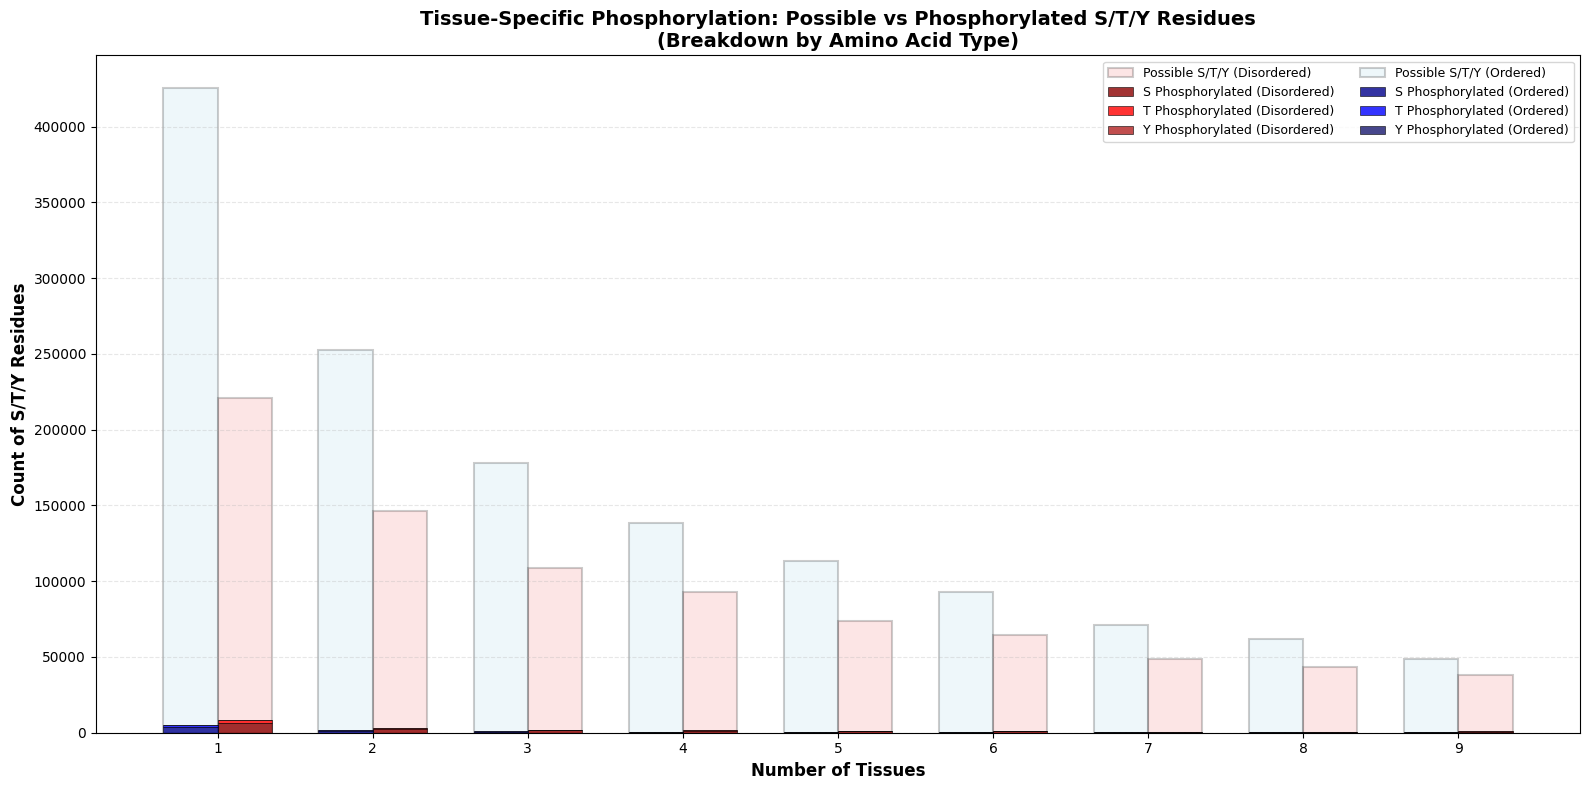

In [11]:
# Graph of possible and actual phosphorylation sites per tissue number: MOUSE

import matplotlib.patches as mpatches

# Calculate phosphorylated S/T/Y counts per tissue number from df_mouse
print("Calculating phosphorylated S/T/Y counts per tissue number...")

# Filter for S, T, Y residues only
df_mouse_sty = df_mouse[df_mouse['amino_acid'].isin(['S', 'T', 'Y'])]

# Initialize lists for phosphorylated counts
phosphorylated_disordered = []
phosphorylated_ordered = []

# Breakdown by amino acid type
S_phosphorylated_disordered = []
T_phosphorylated_disordered = []
Y_phosphorylated_disordered = []

S_phosphorylated_ordered = []
T_phosphorylated_ordered = []
Y_phosphorylated_ordered = []

for tissue_num in range(1, 10):
    # Disordered phosphorylated sites
    dis = df_mouse_sty[(df_mouse_sty['total_tissue_num'] == tissue_num) & 
                       (df_mouse_sty['disordered?'] == 1)]
    phosphorylated_disordered.append(len(dis))
    
    # Breakdown by amino acid for disordered
    S_phosphorylated_disordered.append(len(dis[dis['amino_acid'] == 'S']))
    T_phosphorylated_disordered.append(len(dis[dis['amino_acid'] == 'T']))
    Y_phosphorylated_disordered.append(len(dis[dis['amino_acid'] == 'Y']))
    
    # Ordered phosphorylated sites
    ord = df_mouse_sty[(df_mouse_sty['total_tissue_num'] == tissue_num) & 
                       (df_mouse_sty['disordered?'] == 0)]
    phosphorylated_ordered.append(len(ord))
    
    # Breakdown by amino acid for ordered
    S_phosphorylated_ordered.append(len(ord[ord['amino_acid'] == 'S']))
    T_phosphorylated_ordered.append(len(ord[ord['amino_acid'] == 'T']))
    Y_phosphorylated_ordered.append(len(ord[ord['amino_acid'] == 'Y']))


print("Done calculating phosphorylated counts")

# Create tissue_numbers list and get possible S/T/Y counts from Mouse_sty_counts
tissue_numbers = list(range(1, 10))  # Tissue numbers 1-9 for mouse
Mouse_disordered_sty_num = [Mouse_sty_counts['disordered'][tn] for tn in tissue_numbers]
Mouse_ordered_sty_num = [Mouse_sty_counts['ordered'][tn] for tn in tissue_numbers]

# Create figure
fig, ax = plt.subplots(figsize=(16, 8))

x = np.arange(len(tissue_numbers))
width = 0.35

# DISORDERED BARS (right side)
disordered_x = x + width/2

# Layer 1: Possible S/T/Y (full bar - light color, transparent container)
bars1_dis = ax.bar(disordered_x, Mouse_disordered_sty_num, width,
                   label='Possible S/T/Y (Disordered)',
                   color='lightcoral', alpha=0.2, edgecolor='black', linewidth=1.5)

# Layer 2: Phosphorylated S/T/Y breakdown (S, T, Y stacked inside possible)
# S (bottom of phosphorylated stack)
bars2_dis_S = ax.bar(disordered_x, S_phosphorylated_disordered, width,
                     bottom=[0] * len(tissue_numbers), label='S Phosphorylated (Disordered)',
                     color='darkred', alpha=0.8, edgecolor='black', linewidth=0.5)

# T (on top of S)
bars2_dis_T = ax.bar(disordered_x, T_phosphorylated_disordered, width,
                     bottom=S_phosphorylated_disordered, label='T Phosphorylated (Disordered)',
                     color='red', alpha=0.8, edgecolor='black', linewidth=0.5)

# Y (on top of T)
bars2_dis_Y = ax.bar(disordered_x, Y_phosphorylated_disordered, width,
                     bottom=[s + t for s, t in zip(S_phosphorylated_disordered, T_phosphorylated_disordered)],
                     label='Y Phosphorylated (Disordered)',
                     color='firebrick', alpha=0.8, edgecolor='black', linewidth=0.5)

# ORDERED BARS (left side)
ordered_x = x - width/2

# Layer 1: Possible S/T/Y (full bar - light color, transparent container)
bars1_ord = ax.bar(ordered_x, Mouse_ordered_sty_num, width,
                   label='Possible S/T/Y (Ordered)',
                   color='lightblue', alpha=0.2, edgecolor='black', linewidth=1.5)

# Layer 2: Phosphorylated S/T/Y breakdown (S, T, Y stacked inside possible)
# S (bottom of phosphorylated stack)
bars2_ord_S = ax.bar(ordered_x, S_phosphorylated_ordered, width,
                     bottom=[0] * len(tissue_numbers), label='S Phosphorylated (Ordered)',
                     color='darkblue', alpha=0.8, edgecolor='black', linewidth=0.5)

# T (on top of S)
bars2_ord_T = ax.bar(ordered_x, T_phosphorylated_ordered, width,
                     bottom=S_phosphorylated_ordered, label='T Phosphorylated (Ordered)',
                     color='blue', alpha=0.8, edgecolor='black', linewidth=0.5)

# Y (on top of T)
bars2_ord_Y = ax.bar(ordered_x, Y_phosphorylated_ordered, width,
                     bottom=[s + t for s, t in zip(S_phosphorylated_ordered, T_phosphorylated_ordered)],
                     label='Y Phosphorylated (Ordered)',
                     color='midnightblue', alpha=0.8, edgecolor='black', linewidth=0.5)

# Customize
ax.set_xlabel('Number of Tissues', fontsize=12, fontweight='bold')
ax.set_ylabel('Count of S/T/Y Residues', fontsize=12, fontweight='bold')
ax.set_title('Tissue-Specific Phosphorylation: Possible vs Phosphorylated S/T/Y Residues\n(Breakdown by Amino Acid Type)', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(tissue_numbers)
ax.legend(loc='upper right', fontsize=9, ncol=2)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()




Calculating percentage of possible S, T, Y residues that are phosphorylated...


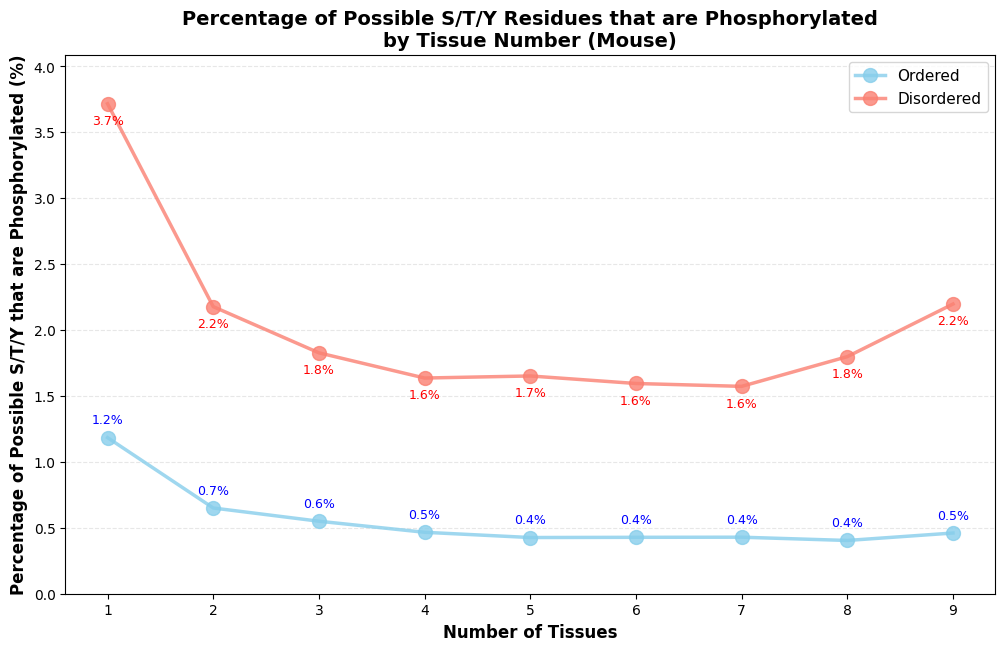

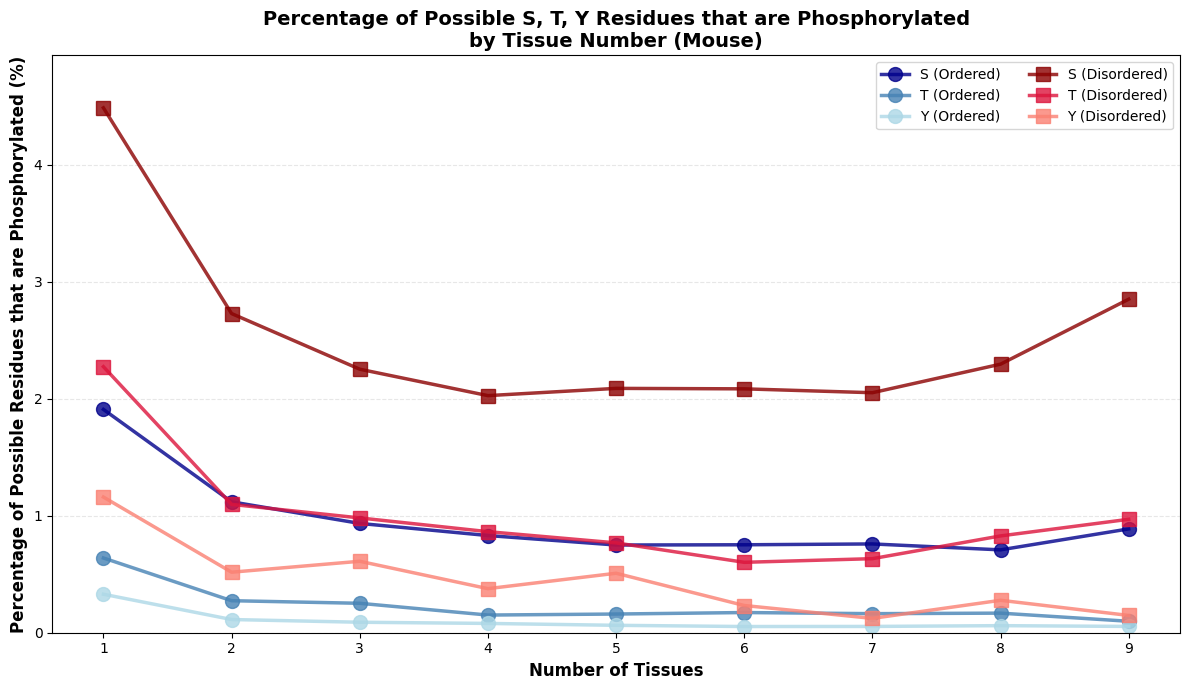


Percentage of Possible S/T/Y that are Phosphorylated:
Tissue 1:
  Ordered: 1.18% (5,041 / 425,715)
  Disordered: 3.72% (8,200 / 220,595)

Tissue 2:
  Ordered: 0.65% (1,644 / 252,773)
  Disordered: 2.18% (3,187 / 146,344)

Tissue 3:
  Ordered: 0.55% (979 / 177,994)
  Disordered: 1.83% (1,990 / 108,897)

Tissue 4:
  Ordered: 0.47% (645 / 138,397)
  Disordered: 1.64% (1,522 / 93,015)

Tissue 5:
  Ordered: 0.43% (483 / 113,309)
  Disordered: 1.65% (1,216 / 73,612)

Tissue 6:
  Ordered: 0.43% (397 / 92,777)
  Disordered: 1.59% (1,026 / 64,332)

Tissue 7:
  Ordered: 0.43% (305 / 71,125)
  Disordered: 1.57% (761 / 48,377)

Tissue 8:
  Ordered: 0.40% (250 / 61,880)
  Disordered: 1.80% (776 / 43,146)

Tissue 9:
  Ordered: 0.46% (223 / 48,425)
  Disordered: 2.20% (839 / 38,176)


Percentage of Possible S, T, Y Residues that are Phosphorylated (by Ordered/Disordered):
Tissue 1:
  S - Ordered: 1.91% (3,862 / 202,428)
  S - Disordered: 4.48% (6,702 / 149,445)
  T - Ordered: 0.64% (917 / 143,622)
 

In [12]:
# Line graph: Percentage of possible S/T/Y that are phosphorylated (MOUSE)

# Calculate percentages: (phosphorylated / possible) * 100
percentage_disordered = []
percentage_ordered = []

for i in range(len(tissue_numbers)):
    tissue_num = tissue_numbers[i]
    
    # Calculate percentage for disordered
    if Mouse_disordered_sty_num[i] > 0:
        pct_dis = (phosphorylated_disordered[i] / Mouse_disordered_sty_num[i]) * 100
    else:
        pct_dis = 0
    percentage_disordered.append(pct_dis)
    
    # Calculate percentage for ordered
    if Mouse_ordered_sty_num[i] > 0:
        pct_ord = (phosphorylated_ordered[i] / Mouse_ordered_sty_num[i]) * 100
    else:
        pct_ord = 0
    percentage_ordered.append(pct_ord)

# Create line graph
fig, ax = plt.subplots(figsize=(12, 7))

# Plot lines with markers
ax.plot(tissue_numbers, percentage_ordered, 'o-', label='Ordered', 
        color='skyblue', linewidth=2.5, markersize=10, alpha=0.8)
ax.plot(tissue_numbers, percentage_disordered, 'o-', label='Disordered', 
        color='salmon', linewidth=2.5, markersize=10, alpha=0.8)

# Customize
ax.set_xlabel('Number of Tissues', fontsize=12, fontweight='bold')
ax.set_ylabel('Percentage of Possible S/T/Y that are Phosphorylated (%)', fontsize=12, fontweight='bold')
ax.set_title('Percentage of Possible S/T/Y Residues that are Phosphorylated\nby Tissue Number (Mouse)', 
             fontsize=14, fontweight='bold')
ax.set_xticks(tissue_numbers)
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3, linestyle='--', axis='y')
ax.set_ylim(0, max(max(percentage_ordered), max(percentage_disordered)) * 1.1)

# Add value labels on points
for i, (tissue_num, pct_ord, pct_dis) in enumerate(zip(tissue_numbers, percentage_ordered, percentage_disordered)):
    ax.annotate(f'{pct_ord:.1f}%', (tissue_num, pct_ord), 
                textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='blue')
    ax.annotate(f'{pct_dis:.1f}%', (tissue_num, pct_dis), 
                textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='red')

# Line graph: Percentage of possible S, T, Y residues that are phosphorylated (MOUSE)
print("\nCalculating percentage of possible S, T, Y residues that are phosphorylated...")

# Get phosphorylated S, T, Y counts for each tissue number
df_mouse_sty = df_mouse[df_mouse['amino_acid'].isin(['S', 'T', 'Y'])]
S_phosphorylated_by_tissue = []
T_phosphorylated_by_tissue = []
Y_phosphorylated_by_tissue = []

for tissue_num in tissue_numbers:
    # Count phosphorylated S, T, Y residues for this tissue number
    s_phosphorylated = len(df_mouse_sty[(df_mouse_sty['total_tissue_num'] == tissue_num) & 
                                        (df_mouse_sty['amino_acid'] == 'S')])
    t_phosphorylated = len(df_mouse_sty[(df_mouse_sty['total_tissue_num'] == tissue_num) & 
                                        (df_mouse_sty['amino_acid'] == 'T')])
    y_phosphorylated = len(df_mouse_sty[(df_mouse_sty['total_tissue_num'] == tissue_num) & 
                                        (df_mouse_sty['amino_acid'] == 'Y')])
    S_phosphorylated_by_tissue.append(s_phosphorylated)
    T_phosphorylated_by_tissue.append(t_phosphorylated)
    Y_phosphorylated_by_tissue.append(y_phosphorylated)

# Get possible S, T, Y counts for each tissue number from Mouse_s_counts, Mouse_t_counts, Mouse_y_counts
Mouse_possible_s_by_tissue = []
Mouse_possible_t_by_tissue = []
Mouse_possible_y_by_tissue = []

for tissue_num in tissue_numbers:
    # Sum ordered and disordered S, T, Y residues
    possible_s = Mouse_s_counts['disordered'][tissue_num] + Mouse_s_counts['ordered'][tissue_num]
    possible_t = Mouse_t_counts['disordered'][tissue_num] + Mouse_t_counts['ordered'][tissue_num]
    possible_y = Mouse_y_counts['disordered'][tissue_num] + Mouse_y_counts['ordered'][tissue_num]
    Mouse_possible_s_by_tissue.append(possible_s)
    Mouse_possible_t_by_tissue.append(possible_t)
    Mouse_possible_y_by_tissue.append(possible_y)

# Calculate percentages for S, T, Y (total)
percentage_s_phosphorylated = []
percentage_t_phosphorylated = []
percentage_y_phosphorylated = []

for i in range(len(tissue_numbers)):
    if Mouse_possible_s_by_tissue[i] > 0:
        pct_s = (S_phosphorylated_by_tissue[i] / Mouse_possible_s_by_tissue[i]) * 100
    else:
        pct_s = 0
    percentage_s_phosphorylated.append(pct_s)
    
    if Mouse_possible_t_by_tissue[i] > 0:
        pct_t = (T_phosphorylated_by_tissue[i] / Mouse_possible_t_by_tissue[i]) * 100
    else:
        pct_t = 0
    percentage_t_phosphorylated.append(pct_t)
    
    if Mouse_possible_y_by_tissue[i] > 0:
        pct_y = (Y_phosphorylated_by_tissue[i] / Mouse_possible_y_by_tissue[i]) * 100
    else:
        pct_y = 0
    percentage_y_phosphorylated.append(pct_y)

# Calculate percentages for ordered and disordered separately
# S ordered and disordered
S_phosphorylated_ordered = []
S_phosphorylated_disordered = []
for tissue_num in tissue_numbers:
    s_ordered = len(df_mouse_sty[(df_mouse_sty['total_tissue_num'] == tissue_num) & 
                                 (df_mouse_sty['amino_acid'] == 'S') & 
                                 (df_mouse_sty['disordered?'] == 0)])
    s_disordered = len(df_mouse_sty[(df_mouse_sty['total_tissue_num'] == tissue_num) & 
                                    (df_mouse_sty['amino_acid'] == 'S') & 
                                    (df_mouse_sty['disordered?'] == 1)])
    S_phosphorylated_ordered.append(s_ordered)
    S_phosphorylated_disordered.append(s_disordered)

percentage_s_ordered = []
percentage_s_disordered = []
for i in range(len(tissue_numbers)):
    if Mouse_s_counts['ordered'][tissue_numbers[i]] > 0:
        pct_s_ord = (S_phosphorylated_ordered[i] / Mouse_s_counts['ordered'][tissue_numbers[i]]) * 100
    else:
        pct_s_ord = 0
    percentage_s_ordered.append(pct_s_ord)
    
    if Mouse_s_counts['disordered'][tissue_numbers[i]] > 0:
        pct_s_dis = (S_phosphorylated_disordered[i] / Mouse_s_counts['disordered'][tissue_numbers[i]]) * 100
    else:
        pct_s_dis = 0
    percentage_s_disordered.append(pct_s_dis)

# T ordered and disordered
T_phosphorylated_ordered = []
T_phosphorylated_disordered = []
for tissue_num in tissue_numbers:
    t_ordered = len(df_mouse_sty[(df_mouse_sty['total_tissue_num'] == tissue_num) & 
                                 (df_mouse_sty['amino_acid'] == 'T') & 
                                 (df_mouse_sty['disordered?'] == 0)])
    t_disordered = len(df_mouse_sty[(df_mouse_sty['total_tissue_num'] == tissue_num) & 
                                    (df_mouse_sty['amino_acid'] == 'T') & 
                                    (df_mouse_sty['disordered?'] == 1)])
    T_phosphorylated_ordered.append(t_ordered)
    T_phosphorylated_disordered.append(t_disordered)

percentage_t_ordered = []
percentage_t_disordered = []
for i in range(len(tissue_numbers)):
    if Mouse_t_counts['ordered'][tissue_numbers[i]] > 0:
        pct_t_ord = (T_phosphorylated_ordered[i] / Mouse_t_counts['ordered'][tissue_numbers[i]]) * 100
    else:
        pct_t_ord = 0
    percentage_t_ordered.append(pct_t_ord)
    
    if Mouse_t_counts['disordered'][tissue_numbers[i]] > 0:
        pct_t_dis = (T_phosphorylated_disordered[i] / Mouse_t_counts['disordered'][tissue_numbers[i]]) * 100
    else:
        pct_t_dis = 0
    percentage_t_disordered.append(pct_t_dis)

# Y ordered and disordered
Y_phosphorylated_ordered = []
Y_phosphorylated_disordered = []
for tissue_num in tissue_numbers:
    y_ordered = len(df_mouse_sty[(df_mouse_sty['total_tissue_num'] == tissue_num) & 
                                 (df_mouse_sty['amino_acid'] == 'Y') & 
                                 (df_mouse_sty['disordered?'] == 0)])
    y_disordered = len(df_mouse_sty[(df_mouse_sty['total_tissue_num'] == tissue_num) & 
                                    (df_mouse_sty['amino_acid'] == 'Y') & 
                                    (df_mouse_sty['disordered?'] == 1)])
    Y_phosphorylated_ordered.append(y_ordered)
    Y_phosphorylated_disordered.append(y_disordered)

percentage_y_ordered = []
percentage_y_disordered = []
for i in range(len(tissue_numbers)):
    if Mouse_y_counts['ordered'][tissue_numbers[i]] > 0:
        pct_y_ord = (Y_phosphorylated_ordered[i] / Mouse_y_counts['ordered'][tissue_numbers[i]]) * 100
    else:
        pct_y_ord = 0
    percentage_y_ordered.append(pct_y_ord)
    
    if Mouse_y_counts['disordered'][tissue_numbers[i]] > 0:
        pct_y_dis = (Y_phosphorylated_disordered[i] / Mouse_y_counts['disordered'][tissue_numbers[i]]) * 100
    else:
        pct_y_dis = 0
    percentage_y_disordered.append(pct_y_dis)

# Create line graph
fig, ax = plt.subplots(figsize=(12, 7))

# Define colors: different shades for S, T, Y
# Blue shades for ordered (darker = S, medium = T, lighter = Y)
# Red shades for disordered (darker = S, medium = T, lighter = Y)
colors_s_ordered = 'darkblue'      # Dark blue for S ordered
colors_t_ordered = 'steelblue'      # Medium blue for T ordered
colors_y_ordered = 'lightblue'     # Light blue for Y ordered
colors_s_disordered = 'darkred'    # Dark red for S disordered
colors_t_disordered = 'crimson'    # Medium red for T disordered
colors_y_disordered = 'salmon'      # Light red for Y disordered

# Plot lines with markers for ordered (blue shades)
ax.plot(tissue_numbers, percentage_s_ordered, 'o-', label='S (Ordered)', 
        color=colors_s_ordered, linewidth=2.5, markersize=10, alpha=0.8)
ax.plot(tissue_numbers, percentage_t_ordered, 'o-', label='T (Ordered)', 
        color=colors_t_ordered, linewidth=2.5, markersize=10, alpha=0.8)
ax.plot(tissue_numbers, percentage_y_ordered, 'o-', label='Y (Ordered)', 
        color=colors_y_ordered, linewidth=2.5, markersize=10, alpha=0.8)

# Plot lines with markers for disordered (red shades)
ax.plot(tissue_numbers, percentage_s_disordered, 's-', label='S (Disordered)', 
        color=colors_s_disordered, linewidth=2.5, markersize=10, alpha=0.8)
ax.plot(tissue_numbers, percentage_t_disordered, 's-', label='T (Disordered)', 
        color=colors_t_disordered, linewidth=2.5, markersize=10, alpha=0.8)
ax.plot(tissue_numbers, percentage_y_disordered, 's-', label='Y (Disordered)', 
        color=colors_y_disordered, linewidth=2.5, markersize=10, alpha=0.8)

# Customize
ax.set_xlabel('Number of Tissues', fontsize=12, fontweight='bold')
ax.set_ylabel('Percentage of Possible Residues that are Phosphorylated (%)', fontsize=12, fontweight='bold')
ax.set_title('Percentage of Possible S, T, Y Residues that are Phosphorylated\nby Tissue Number (Mouse)', 
             fontsize=14, fontweight='bold')
ax.set_xticks(tissue_numbers)
ax.legend(loc='best', fontsize=10, ncol=2)
ax.grid(True, alpha=0.3, linestyle='--', axis='y')

# Set y-axis limits
all_percentages = (percentage_s_ordered + percentage_s_disordered + 
                   percentage_t_ordered + percentage_t_disordered + 
                   percentage_y_ordered + percentage_y_disordered)
if len(all_percentages) > 0:
    ax.set_ylim(0, max(all_percentages) * 1.1)

plt.tight_layout()
plt.show()

# Print summary
print("\nPercentage of Possible S/T/Y that are Phosphorylated:")
for i, tissue_num in enumerate(tissue_numbers):
    print(f"Tissue {tissue_num}:")
    print(f"  Ordered: {percentage_ordered[i]:.2f}% ({phosphorylated_ordered[i]:,} / {Mouse_ordered_sty_num[i]:,})")
    print(f"  Disordered: {percentage_disordered[i]:.2f}% ({phosphorylated_disordered[i]:,} / {Mouse_disordered_sty_num[i]:,})")
    print()

# Print summary for S, T, Y residues (ordered and disordered)
print("\nPercentage of Possible S, T, Y Residues that are Phosphorylated (by Ordered/Disordered):")
for i, tissue_num in enumerate(tissue_numbers):
    print(f"Tissue {tissue_num}:")
    print(f"  S - Ordered: {percentage_s_ordered[i]:.2f}% ({S_phosphorylated_ordered[i]:,} / {Mouse_s_counts['ordered'][tissue_num]:,})")
    print(f"  S - Disordered: {percentage_s_disordered[i]:.2f}% ({S_phosphorylated_disordered[i]:,} / {Mouse_s_counts['disordered'][tissue_num]:,})")
    print(f"  T - Ordered: {percentage_t_ordered[i]:.2f}% ({T_phosphorylated_ordered[i]:,} / {Mouse_t_counts['ordered'][tissue_num]:,})")
    print(f"  T - Disordered: {percentage_t_disordered[i]:.2f}% ({T_phosphorylated_disordered[i]:,} / {Mouse_t_counts['disordered'][tissue_num]:,})")
    print(f"  Y - Ordered: {percentage_y_ordered[i]:.2f}% ({Y_phosphorylated_ordered[i]:,} / {Mouse_y_counts['ordered'][tissue_num]:,})")
    print(f"  Y - Disordered: {percentage_y_disordered[i]:.2f}% ({Y_phosphorylated_disordered[i]:,} / {Mouse_y_counts['disordered'][tissue_num]:,})")
    print()





Calculating percentage of possible S/T/Y residues that are phosphorylated for rat...
Tissue counts found in rat data: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14)]
Calculating phosphorylated S/T/Y counts per tissue number for rat...


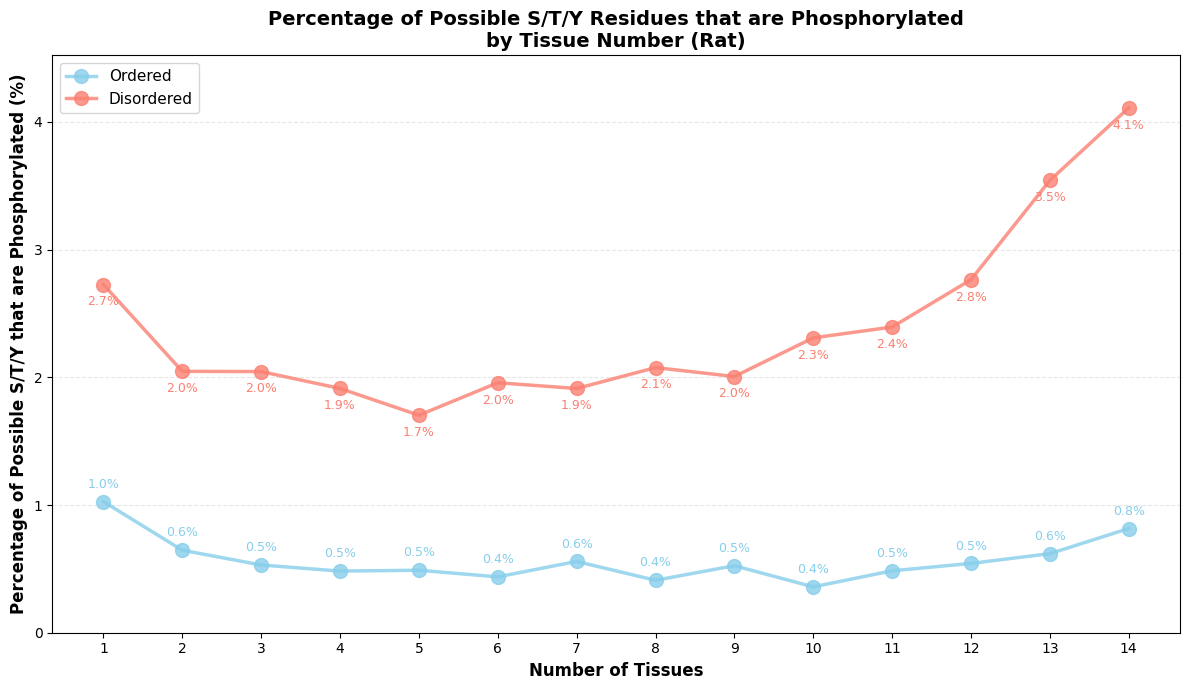


Calculating percentage of possible S, T, Y residues that are phosphorylated for rat...


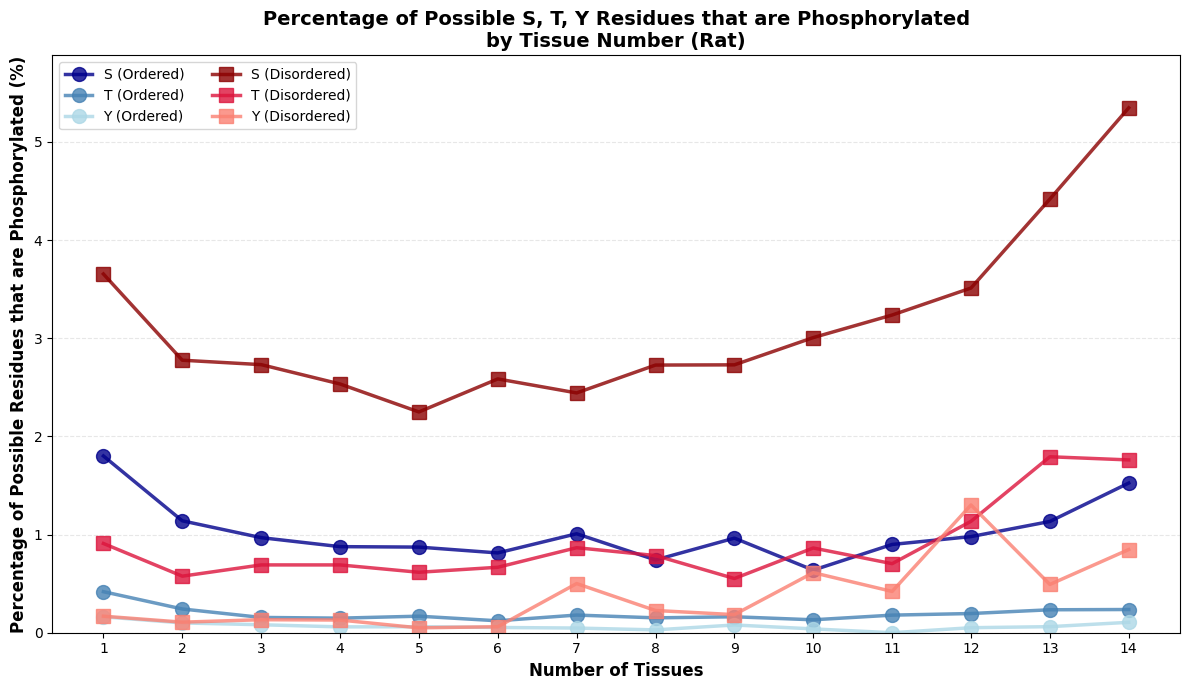


Creating bar graph for rat data...


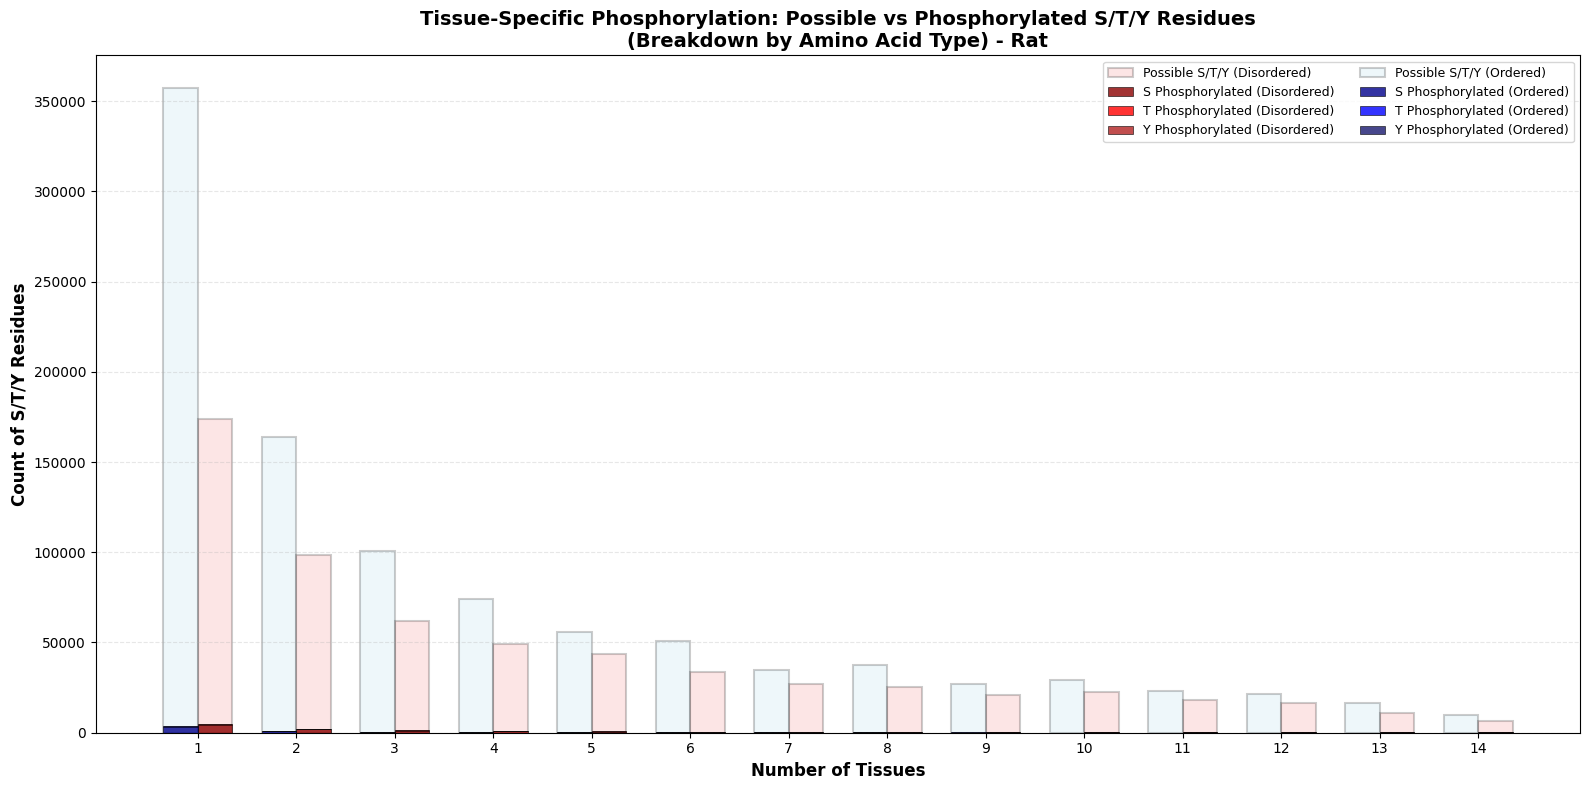

Done creating bar graph

Percentage of Possible S, T, Y Residues that are Phosphorylated (by Ordered/Disordered) - Rat:
Tissue 1:
  S - Ordered: 1.80% (3,055 / 169,652)
  S - Disordered: 3.65% (4,283 / 117,188)
  T - Ordered: 0.42% (507 / 121,233)
  T - Disordered: 0.91% (438 / 48,177)
  Y - Ordered: 0.16% (108 / 66,608)
  Y - Disordered: 0.17% (14 / 8,313)

Tissue 2:
  S - Ordered: 1.14% (896 / 78,590)
  S - Disordered: 2.78% (1,858 / 66,922)
  T - Ordered: 0.24% (134 / 55,401)
  T - Disordered: 0.58% (156 / 27,074)
  Y - Ordered: 0.10% (30 / 30,068)
  Y - Disordered: 0.11% (5 / 4,646)

Tissue 3:
  S - Ordered: 0.97% (465 / 48,007)
  S - Disordered: 2.73% (1,142 / 41,811)
  T - Ordered: 0.16% (53 / 34,031)
  T - Disordered: 0.69% (117 / 16,936)
  Y - Ordered: 0.08% (15 / 18,452)
  Y - Disordered: 0.13% (4 / 3,016)

Tissue 4:
  S - Ordered: 0.88% (312 / 35,577)
  S - Disordered: 2.53% (847 / 33,423)
  T - Ordered: 0.15% (37 / 24,928)
  T - Disordered: 0.69% (94 / 13,609)
  Y - Ordered:

In [13]:
# Line graph: Percentage of possible S/T/Y that are phosphorylated (RAT)
print("\nCalculating percentage of possible S/T/Y residues that are phosphorylated for rat...")

# First, get unique tissue numbers from rat data
df_rat_sty = df_rat[df_rat['amino_acid'].isin(['S', 'T', 'Y'])]
unique_tissue_counts_rat = sorted(df_rat_sty['total_tissue_num'].unique())
# Filter out tissue count 0
unique_tissue_counts_rat = [tn for tn in unique_tissue_counts_rat if tn > 0]
print(f"Tissue counts found in rat data: {unique_tissue_counts_rat}")

# Calculate phosphorylated S/T/Y counts per tissue number from df_rat
print("Calculating phosphorylated S/T/Y counts per tissue number for rat...")

# Initialize lists for phosphorylated counts
phosphorylated_disordered_rat = []
phosphorylated_ordered_rat = []

# Calculate phosphorylated counts for each tissue number
for tissue_count in unique_tissue_counts_rat:
    # Disordered phosphorylated sites
    dis = df_rat_sty[(df_rat_sty['total_tissue_num'] == tissue_count) & 
                     (df_rat_sty['disordered?'] == 1)]
    phosphorylated_disordered_rat.append(len(dis))
    
    # Ordered phosphorylated sites
    ord = df_rat_sty[(df_rat_sty['total_tissue_num'] == tissue_count) & 
                     (df_rat_sty['disordered?'] == 0)]
    phosphorylated_ordered_rat.append(len(ord))

# Get possible S/T/Y counts from Rat_sty_counts (calculated for all tissue numbers)
Rat_disordered_sty_num = []
Rat_ordered_sty_num = []

for tissue_count in unique_tissue_counts_rat:
    # Use Rat_sty_counts which now contains all tissue numbers
    if tissue_count in Rat_sty_counts['disordered'] and tissue_count in Rat_sty_counts['ordered']:
        Rat_disordered_sty_num.append(Rat_sty_counts['disordered'][tissue_count])
        Rat_ordered_sty_num.append(Rat_sty_counts['ordered'][tissue_count])
    else:
        # If not in Rat_sty_counts, set to 0
        Rat_disordered_sty_num.append(0)
        Rat_ordered_sty_num.append(0)

# Calculate percentages: (phosphorylated / possible) * 100
percentage_disordered_rat = []
percentage_ordered_rat = []

for i in range(len(unique_tissue_counts_rat)):
    tissue_num = unique_tissue_counts_rat[i]
    
    # Calculate percentage for disordered
    if Rat_disordered_sty_num[i] > 0:
        pct_dis = (phosphorylated_disordered_rat[i] / Rat_disordered_sty_num[i]) * 100
    else:
        pct_dis = 0
    percentage_disordered_rat.append(pct_dis)
    
    # Calculate percentage for ordered
    if Rat_ordered_sty_num[i] > 0:
        pct_ord = (phosphorylated_ordered_rat[i] / Rat_ordered_sty_num[i]) * 100
    else:
        pct_ord = 0
    percentage_ordered_rat.append(pct_ord)

# Create original line graph (Ordered vs Disordered)
fig, ax = plt.subplots(figsize=(12, 7))

# Plot lines with markers
ax.plot(unique_tissue_counts_rat, percentage_ordered_rat, 'o-', label='Ordered', 
        color='skyblue', linewidth=2.5, markersize=10, alpha=0.8)
ax.plot(unique_tissue_counts_rat, percentage_disordered_rat, 'o-', label='Disordered', 
        color='salmon', linewidth=2.5, markersize=10, alpha=0.8)

# Customize
ax.set_xlabel('Number of Tissues', fontsize=12, fontweight='bold')
ax.set_ylabel('Percentage of Possible S/T/Y that are Phosphorylated (%)', fontsize=12, fontweight='bold')
ax.set_title('Percentage of Possible S/T/Y Residues that are Phosphorylated\nby Tissue Number (Rat)', 
             fontsize=14, fontweight='bold')
ax.set_xticks(unique_tissue_counts_rat)
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3, linestyle='--', axis='y')
if len(percentage_ordered_rat) > 0 and len(percentage_disordered_rat) > 0:
    ax.set_ylim(0, max(max(percentage_ordered_rat), max(percentage_disordered_rat)) * 1.1)

# Add value labels on points
for i, (tissue_num, pct_ord, pct_dis) in enumerate(zip(unique_tissue_counts_rat, percentage_ordered_rat, percentage_disordered_rat)):
    ax.annotate(f'{pct_ord:.1f}%', (tissue_num, pct_ord), 
                textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='skyblue')
    ax.annotate(f'{pct_dis:.1f}%', (tissue_num, pct_dis), 
                textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9, color='salmon')

plt.tight_layout()
plt.show()

# Line graph: Percentage of possible S, T, Y residues that are phosphorylated (RAT)
print("\nCalculating percentage of possible S, T, Y residues that are phosphorylated for rat...")

# Get phosphorylated S, T, Y counts for each tissue number
S_phosphorylated_by_tissue_rat = []
T_phosphorylated_by_tissue_rat = []
Y_phosphorylated_by_tissue_rat = []

for tissue_num in unique_tissue_counts_rat:
    # Count phosphorylated S, T, Y residues for this tissue number
    s_phosphorylated = len(df_rat_sty[(df_rat_sty['total_tissue_num'] == tissue_num) & 
                                     (df_rat_sty['amino_acid'] == 'S')])
    t_phosphorylated = len(df_rat_sty[(df_rat_sty['total_tissue_num'] == tissue_num) & 
                                     (df_rat_sty['amino_acid'] == 'T')])
    y_phosphorylated = len(df_rat_sty[(df_rat_sty['total_tissue_num'] == tissue_num) & 
                                     (df_rat_sty['amino_acid'] == 'Y')])
    S_phosphorylated_by_tissue_rat.append(s_phosphorylated)
    T_phosphorylated_by_tissue_rat.append(t_phosphorylated)
    Y_phosphorylated_by_tissue_rat.append(y_phosphorylated)

# Get possible S, T, Y counts for each tissue number from Rat_s_counts, Rat_t_counts, Rat_y_counts
Rat_possible_s_by_tissue = []
Rat_possible_t_by_tissue = []
Rat_possible_y_by_tissue = []

for tissue_num in unique_tissue_counts_rat:
    # Sum ordered and disordered S, T, Y residues
    if tissue_num in Rat_s_counts['disordered'] and tissue_num in Rat_s_counts['ordered']:
        possible_s = Rat_s_counts['disordered'][tissue_num] + Rat_s_counts['ordered'][tissue_num]
    else:
        possible_s = 0
    if tissue_num in Rat_t_counts['disordered'] and tissue_num in Rat_t_counts['ordered']:
        possible_t = Rat_t_counts['disordered'][tissue_num] + Rat_t_counts['ordered'][tissue_num]
    else:
        possible_t = 0
    if tissue_num in Rat_y_counts['disordered'] and tissue_num in Rat_y_counts['ordered']:
        possible_y = Rat_y_counts['disordered'][tissue_num] + Rat_y_counts['ordered'][tissue_num]
    else:
        possible_y = 0
    Rat_possible_s_by_tissue.append(possible_s)
    Rat_possible_t_by_tissue.append(possible_t)
    Rat_possible_y_by_tissue.append(possible_y)

# Calculate percentages for ordered and disordered separately
# S ordered and disordered
S_phosphorylated_ordered_rat = []
S_phosphorylated_disordered_rat = []
for tissue_num in unique_tissue_counts_rat:
    s_ordered = len(df_rat_sty[(df_rat_sty['total_tissue_num'] == tissue_num) & 
                               (df_rat_sty['amino_acid'] == 'S') & 
                               (df_rat_sty['disordered?'] == 0)])
    s_disordered = len(df_rat_sty[(df_rat_sty['total_tissue_num'] == tissue_num) & 
                                  (df_rat_sty['amino_acid'] == 'S') & 
                                  (df_rat_sty['disordered?'] == 1)])
    S_phosphorylated_ordered_rat.append(s_ordered)
    S_phosphorylated_disordered_rat.append(s_disordered)

percentage_s_ordered_rat = []
percentage_s_disordered_rat = []
for i in range(len(unique_tissue_counts_rat)):
    tissue_num = unique_tissue_counts_rat[i]
    if tissue_num in Rat_s_counts['ordered'] and Rat_s_counts['ordered'][tissue_num] > 0:
        pct_s_ord = (S_phosphorylated_ordered_rat[i] / Rat_s_counts['ordered'][tissue_num]) * 100
    else:
        pct_s_ord = 0
    percentage_s_ordered_rat.append(pct_s_ord)
    
    if tissue_num in Rat_s_counts['disordered'] and Rat_s_counts['disordered'][tissue_num] > 0:
        pct_s_dis = (S_phosphorylated_disordered_rat[i] / Rat_s_counts['disordered'][tissue_num]) * 100
    else:
        pct_s_dis = 0
    percentage_s_disordered_rat.append(pct_s_dis)

# T ordered and disordered
T_phosphorylated_ordered_rat = []
T_phosphorylated_disordered_rat = []
for tissue_num in unique_tissue_counts_rat:
    t_ordered = len(df_rat_sty[(df_rat_sty['total_tissue_num'] == tissue_num) & 
                               (df_rat_sty['amino_acid'] == 'T') & 
                               (df_rat_sty['disordered?'] == 0)])
    t_disordered = len(df_rat_sty[(df_rat_sty['total_tissue_num'] == tissue_num) & 
                                  (df_rat_sty['amino_acid'] == 'T') & 
                                  (df_rat_sty['disordered?'] == 1)])
    T_phosphorylated_ordered_rat.append(t_ordered)
    T_phosphorylated_disordered_rat.append(t_disordered)

percentage_t_ordered_rat = []
percentage_t_disordered_rat = []
for i in range(len(unique_tissue_counts_rat)):
    tissue_num = unique_tissue_counts_rat[i]
    if tissue_num in Rat_t_counts['ordered'] and Rat_t_counts['ordered'][tissue_num] > 0:
        pct_t_ord = (T_phosphorylated_ordered_rat[i] / Rat_t_counts['ordered'][tissue_num]) * 100
    else:
        pct_t_ord = 0
    percentage_t_ordered_rat.append(pct_t_ord)
    
    if tissue_num in Rat_t_counts['disordered'] and Rat_t_counts['disordered'][tissue_num] > 0:
        pct_t_dis = (T_phosphorylated_disordered_rat[i] / Rat_t_counts['disordered'][tissue_num]) * 100
    else:
        pct_t_dis = 0
    percentage_t_disordered_rat.append(pct_t_dis)

# Y ordered and disordered
Y_phosphorylated_ordered_rat = []
Y_phosphorylated_disordered_rat = []
for tissue_num in unique_tissue_counts_rat:
    y_ordered = len(df_rat_sty[(df_rat_sty['total_tissue_num'] == tissue_num) & 
                               (df_rat_sty['amino_acid'] == 'Y') & 
                               (df_rat_sty['disordered?'] == 0)])
    y_disordered = len(df_rat_sty[(df_rat_sty['total_tissue_num'] == tissue_num) & 
                                  (df_rat_sty['amino_acid'] == 'Y') & 
                                  (df_rat_sty['disordered?'] == 1)])
    Y_phosphorylated_ordered_rat.append(y_ordered)
    Y_phosphorylated_disordered_rat.append(y_disordered)

percentage_y_ordered_rat = []
percentage_y_disordered_rat = []
for i in range(len(unique_tissue_counts_rat)):
    tissue_num = unique_tissue_counts_rat[i]
    if tissue_num in Rat_y_counts['ordered'] and Rat_y_counts['ordered'][tissue_num] > 0:
        pct_y_ord = (Y_phosphorylated_ordered_rat[i] / Rat_y_counts['ordered'][tissue_num]) * 100
    else:
        pct_y_ord = 0
    percentage_y_ordered_rat.append(pct_y_ord)
    
    if tissue_num in Rat_y_counts['disordered'] and Rat_y_counts['disordered'][tissue_num] > 0:
        pct_y_dis = (Y_phosphorylated_disordered_rat[i] / Rat_y_counts['disordered'][tissue_num]) * 100
    else:
        pct_y_dis = 0
    percentage_y_disordered_rat.append(pct_y_dis)

# Create line graph
fig, ax = plt.subplots(figsize=(12, 7))

# Define colors: different shades for S, T, Y
# Blue shades for ordered (darker = S, medium = T, lighter = Y)
# Red shades for disordered (darker = S, medium = T, lighter = Y)
colors_s_ordered = 'darkblue'      # Dark blue for S ordered
colors_t_ordered = 'steelblue'      # Medium blue for T ordered
colors_y_ordered = 'lightblue'     # Light blue for Y ordered
colors_s_disordered = 'darkred'    # Dark red for S disordered
colors_t_disordered = 'crimson'    # Medium red for T disordered
colors_y_disordered = 'salmon'      # Light red for Y disordered

# Plot lines with markers for ordered (blue shades)
ax.plot(unique_tissue_counts_rat, percentage_s_ordered_rat, 'o-', label='S (Ordered)', 
        color=colors_s_ordered, linewidth=2.5, markersize=10, alpha=0.8)
ax.plot(unique_tissue_counts_rat, percentage_t_ordered_rat, 'o-', label='T (Ordered)', 
        color=colors_t_ordered, linewidth=2.5, markersize=10, alpha=0.8)
ax.plot(unique_tissue_counts_rat, percentage_y_ordered_rat, 'o-', label='Y (Ordered)', 
        color=colors_y_ordered, linewidth=2.5, markersize=10, alpha=0.8)

# Plot lines with markers for disordered (red shades)
ax.plot(unique_tissue_counts_rat, percentage_s_disordered_rat, 's-', label='S (Disordered)', 
        color=colors_s_disordered, linewidth=2.5, markersize=10, alpha=0.8)
ax.plot(unique_tissue_counts_rat, percentage_t_disordered_rat, 's-', label='T (Disordered)', 
        color=colors_t_disordered, linewidth=2.5, markersize=10, alpha=0.8)
ax.plot(unique_tissue_counts_rat, percentage_y_disordered_rat, 's-', label='Y (Disordered)', 
        color=colors_y_disordered, linewidth=2.5, markersize=10, alpha=0.8)

# Customize
ax.set_xlabel('Number of Tissues', fontsize=12, fontweight='bold')
ax.set_ylabel('Percentage of Possible Residues that are Phosphorylated (%)', fontsize=12, fontweight='bold')
ax.set_title('Percentage of Possible S, T, Y Residues that are Phosphorylated\nby Tissue Number (Rat)', 
             fontsize=14, fontweight='bold')
ax.set_xticks(unique_tissue_counts_rat)
ax.legend(loc='best', fontsize=10, ncol=2)
ax.grid(True, alpha=0.3, linestyle='--', axis='y')

# Set y-axis limits
all_percentages_rat = (percentage_s_ordered_rat + percentage_s_disordered_rat + 
                       percentage_t_ordered_rat + percentage_t_disordered_rat + 
                       percentage_y_ordered_rat + percentage_y_disordered_rat)
if len(all_percentages_rat) > 0:
    ax.set_ylim(0, max(all_percentages_rat) * 1.1)

plt.tight_layout()
plt.show()

# Bar graph: Possible and actual phosphorylation sites per tissue number (RAT)
print("\nCreating bar graph for rat data...")

# Calculate S, T, Y breakdown for phosphorylated sites
S_phosphorylated_disordered_rat_bar = []
T_phosphorylated_disordered_rat_bar = []
Y_phosphorylated_disordered_rat_bar = []

S_phosphorylated_ordered_rat_bar = []
T_phosphorylated_ordered_rat_bar = []
Y_phosphorylated_ordered_rat_bar = []

for tissue_num in unique_tissue_counts_rat:
    # Disordered phosphorylated sites
    dis = df_rat_sty[(df_rat_sty['total_tissue_num'] == tissue_num) & 
                     (df_rat_sty['disordered?'] == 1)]
    
    # Breakdown by amino acid for disordered
    S_phosphorylated_disordered_rat_bar.append(len(dis[dis['amino_acid'] == 'S']))
    T_phosphorylated_disordered_rat_bar.append(len(dis[dis['amino_acid'] == 'T']))
    Y_phosphorylated_disordered_rat_bar.append(len(dis[dis['amino_acid'] == 'Y']))
    
    # Ordered phosphorylated sites
    ord = df_rat_sty[(df_rat_sty['total_tissue_num'] == tissue_num) & 
                     (df_rat_sty['disordered?'] == 0)]
    
    # Breakdown by amino acid for ordered
    S_phosphorylated_ordered_rat_bar.append(len(ord[ord['amino_acid'] == 'S']))
    T_phosphorylated_ordered_rat_bar.append(len(ord[ord['amino_acid'] == 'T']))
    Y_phosphorylated_ordered_rat_bar.append(len(ord[ord['amino_acid'] == 'Y']))

# Get possible S/T/Y counts for bar graph
Rat_disordered_sty_num_bar = [Rat_sty_counts['disordered'][tn] for tn in unique_tissue_counts_rat]
Rat_ordered_sty_num_bar = [Rat_sty_counts['ordered'][tn] for tn in unique_tissue_counts_rat]

# Create figure
fig, ax = plt.subplots(figsize=(16, 8))

x = np.arange(len(unique_tissue_counts_rat))
width = 0.35

# DISORDERED BARS (right side)
disordered_x = x + width/2

# Layer 1: Possible S/T/Y (full bar - light color, transparent container)
bars1_dis = ax.bar(disordered_x, Rat_disordered_sty_num_bar, width,
                   label='Possible S/T/Y (Disordered)',
                   color='lightcoral', alpha=0.2, edgecolor='black', linewidth=1.5)

# Layer 2: Phosphorylated S/T/Y breakdown (S, T, Y stacked inside possible)
# S (bottom of phosphorylated stack)
bars2_dis_S = ax.bar(disordered_x, S_phosphorylated_disordered_rat_bar, width,
                     bottom=[0] * len(unique_tissue_counts_rat), label='S Phosphorylated (Disordered)',
                     color='darkred', alpha=0.8, edgecolor='black', linewidth=0.5)

# T (on top of S)
bars2_dis_T = ax.bar(disordered_x, T_phosphorylated_disordered_rat_bar, width,
                     bottom=S_phosphorylated_disordered_rat_bar, label='T Phosphorylated (Disordered)',
                     color='red', alpha=0.8, edgecolor='black', linewidth=0.5)

# Y (on top of T)
bars2_dis_Y = ax.bar(disordered_x, Y_phosphorylated_disordered_rat_bar, width,
                     bottom=[s + t for s, t in zip(S_phosphorylated_disordered_rat_bar, T_phosphorylated_disordered_rat_bar)],
                     label='Y Phosphorylated (Disordered)',
                     color='firebrick', alpha=0.8, edgecolor='black', linewidth=0.5)

# ORDERED BARS (left side)
ordered_x = x - width/2

# Layer 1: Possible S/T/Y (full bar - light color, transparent container)
bars1_ord = ax.bar(ordered_x, Rat_ordered_sty_num_bar, width,
                   label='Possible S/T/Y (Ordered)',
                   color='lightblue', alpha=0.2, edgecolor='black', linewidth=1.5)

# Layer 2: Phosphorylated S/T/Y breakdown (S, T, Y stacked inside possible)
# S (bottom of phosphorylated stack)
bars2_ord_S = ax.bar(ordered_x, S_phosphorylated_ordered_rat_bar, width,
                     bottom=[0] * len(unique_tissue_counts_rat), label='S Phosphorylated (Ordered)',
                     color='darkblue', alpha=0.8, edgecolor='black', linewidth=0.5)

# T (on top of S)
bars2_ord_T = ax.bar(ordered_x, T_phosphorylated_ordered_rat_bar, width,
                     bottom=S_phosphorylated_ordered_rat_bar, label='T Phosphorylated (Ordered)',
                     color='blue', alpha=0.8, edgecolor='black', linewidth=0.5)

# Y (on top of T)
bars2_ord_Y = ax.bar(ordered_x, Y_phosphorylated_ordered_rat_bar, width,
                     bottom=[s + t for s, t in zip(S_phosphorylated_ordered_rat_bar, T_phosphorylated_ordered_rat_bar)],
                     label='Y Phosphorylated (Ordered)',
                     color='midnightblue', alpha=0.8, edgecolor='black', linewidth=0.5)

# Customize
ax.set_xlabel('Number of Tissues', fontsize=12, fontweight='bold')
ax.set_ylabel('Count of S/T/Y Residues', fontsize=12, fontweight='bold')
ax.set_title('Tissue-Specific Phosphorylation: Possible vs Phosphorylated S/T/Y Residues\n(Breakdown by Amino Acid Type) - Rat', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(unique_tissue_counts_rat)
ax.legend(loc='upper right', fontsize=9, ncol=2)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print("Done creating bar graph")

# Print summary for S, T, Y residues (ordered and disordered)
print("\nPercentage of Possible S, T, Y Residues that are Phosphorylated (by Ordered/Disordered) - Rat:")
print("=" * 60)
for i, tissue_num in enumerate(unique_tissue_counts_rat):
    print(f"Tissue {tissue_num}:")
    print(f"  S - Ordered: {percentage_s_ordered_rat[i]:.2f}% ({S_phosphorylated_ordered_rat[i]:,} / {Rat_s_counts['ordered'][tissue_num]:,})")
    print(f"  S - Disordered: {percentage_s_disordered_rat[i]:.2f}% ({S_phosphorylated_disordered_rat[i]:,} / {Rat_s_counts['disordered'][tissue_num]:,})")
    print(f"  T - Ordered: {percentage_t_ordered_rat[i]:.2f}% ({T_phosphorylated_ordered_rat[i]:,} / {Rat_t_counts['ordered'][tissue_num]:,})")
    print(f"  T - Disordered: {percentage_t_disordered_rat[i]:.2f}% ({T_phosphorylated_disordered_rat[i]:,} / {Rat_t_counts['disordered'][tissue_num]:,})")
    print(f"  Y - Ordered: {percentage_y_ordered_rat[i]:.2f}% ({Y_phosphorylated_ordered_rat[i]:,} / {Rat_y_counts['ordered'][tissue_num]:,})")
    print(f"  Y - Disordered: {percentage_y_disordered_rat[i]:.2f}% ({Y_phosphorylated_disordered_rat[i]:,} / {Rat_y_counts['disordered'][tissue_num]:,})")
    print()
